In [197]:
pip install LSTM

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [106]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [162]:
Value8=pd.read_csv("Clarkson_Final_2025.csv")
Value8.set_index("Date",inplace=True)
Value8.reset_index(inplace=True)
Value8["Date"]=pd.to_datetime(Value8["Date"]).dt.strftime("%Y-%m-%d")

In [163]:
Value8

Date  Unnamed: 0  11279201  10722926  10722920  11279177  \
0     2015-01-01           0       NaN       NaN       NaN       NaN   
1     2015-01-02           1       NaN       NaN       NaN       NaN   
2     2015-01-03           2       NaN       NaN       NaN       NaN   
3     2015-01-04           3       NaN       NaN       NaN       NaN   
4     2015-01-05           4       NaN       NaN       NaN       NaN   
...          ...         ...       ...       ...       ...       ...   
3367  2024-03-21        3367       NaN       NaN       NaN       NaN   
3368  2024-03-22        3368      1.66      0.24      84.0      54.0   
3369  2024-03-23        3369       NaN       NaN       NaN       NaN   
3370  2024-03-24        3370       NaN       NaN       NaN       NaN   
3371  2024-03-25        3371       NaN       NaN       NaN       NaN   

      10722565  11278923  10722564  10722922  ...  10722356.1  10510329.1  \
0          NaN       NaN       NaN       NaN  ...         NaN         NaN   
1          NaN       NaN       NaN       NaN  ...         NaN         NaN   
2          NaN       NaN       NaN       NaN  ...         NaN         NaN   
3          NaN       NaN       NaN       NaN  ...         NaN         NaN   
4          NaN       NaN       NaN       NaN  ...         NaN         NaN   
...        ...       ...       ...       ...  ...         ...         ...   
3367       NaN       NaN       NaN       NaN  ...         NaN         NaN   
3368      5.94      3.16     10.39       3.5  ...         NaN         NaN   
3369       NaN       NaN       NaN       NaN  ...         NaN         NaN   
3370       NaN       NaN       NaN       NaN  ...         NaN         NaN   
3371       NaN       NaN       NaN       NaN  ...         NaN         NaN   

      10511374.1  10509987.1  10509791.1  11279195.1  10511369.1  10510450.1  \
0            NaN         NaN         NaN         NaN         NaN         NaN   
1            NaN         NaN         NaN         NaN         NaN         NaN   
2            NaN         NaN         NaN         NaN         NaN         NaN   
3            NaN         NaN         NaN         NaN         NaN         NaN   
4            NaN         NaN         NaN         NaN         NaN         NaN   
...          ...         ...         ...         ...         ...         ...   
3367         NaN         NaN         NaN         NaN         NaN         NaN   
3368         NaN         NaN         NaN         NaN         NaN         NaN   
3369         NaN         NaN         NaN         NaN         NaN         NaN   
3370         NaN         NaN         NaN         NaN         NaN         NaN   
3371         NaN         NaN         NaN         NaN         NaN         NaN   

      10509789.1  10510846.1  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
...          ...         ...  
3367         NaN         NaN  
3368         NaN         NaN  
3369         NaN         NaN  
3370         NaN         NaN  
3371         NaN         NaN  

[3372 rows x 1123 columns]

In [164]:
Value8 = (Value8.set_index('Date')
      .reindex(pd.date_range('2018-01-02', '2024-02-01', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill").reset_index())

In [166]:
Value8[Value8["Date"]=="2024-03-22"]

Empty DataFrame
Columns: [Date, Unnamed: 0, 11279201, 10722926, 10722920, 11279177, 10722565, 11278923, 10722564, 10722922, 10723064, 11278909, 11279193, 11279181, 552163, 10722559, 551531, 10722708, 10722919, 11279176, 10723052, 10722743, 10722566, 10723078, 551421, 10723071, 10723063, 10722921, 10722745, 10722925, 10722626, 10722624, 11278911, 552053, 10722707, 10722560, 10723065, 10722744, 10723051, 10722558, 10722918, 11279192, 10723077, 10723070, 10722923, 10722625, 10723072, 10723050, 551943, 10722706, 10722924, 10723079, 551311, 547798, 547444, 547456, 547436, 547448, 548850, 547460, 547683, 547687, 547794, 547440, 547452, 547464, 547432, 547691, 545386, 549108, 549113, 548041, 548221, 548037, 548493, 545460, 545459, 545458, 545461, 10537288, 551530, 10537792, 10721644, 11279187, 10537749, 552162, 10537780, 11279182, 10537400, 11278910, 10537223, 11278922, 10722360, 10721649, 552052, 10537399, 547994, 10537751, 10537789, 10722362, ...]
Index: []

[0 rows x 1123 columns]

In [111]:
Value8.set_index("Date",inplace=True)

In [178]:
Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)


In [179]:
Data_1.head()

Unnamed: 0  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  \
Date                                                                      
2014-06-02           0      13825.0     16590.0     19070.0     23014.0   
2014-06-03           1      15010.0     18002.0     20302.0     23880.0   
2014-06-04           2      15050.0     18052.0     20372.0     23850.0   
2014-06-05           3      14715.0     17748.0     20094.0     23630.0   
2014-06-06           4      14812.0     17762.0     20114.0     23700.0   

            5TC_C+4MON  5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  \
Date                                                               ...   
2014-06-02     25734.0           0    13825.0   19558.0   27098.0  ...   
2014-06-03     26872.0           0    15010.0   20728.0   28084.0  ...   
2014-06-04     27132.0           0    15050.0   20758.0   27971.0  ...   
2014-06-05     27382.0           0    14715.0   20491.0   27581.0  ...   
2014-06-06     27548.0           0    14812.0   20525.0   27650.0  ...   

            5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                           
2014-06-02   18853.0   24375.0   30023.0     21981.0     20808.0     20254.0   
2014-06-03   19230.0   24893.0   30483.0     22445.0     21051.0     20396.0   
2014-06-04   19220.0   24808.0   30588.0     22473.0     21001.0     20386.0   
2014-06-05   18918.0   24480.0   30370.0     22267.0     20900.0     20295.0   
2014-06-06   18958.0   24553.0   30473.0     22287.0     20940.0     20294.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2014-06-02     19745.0     19585.0     19418.0     19258.0  
2014-06-03     19836.0     19625.0     19458.0     19298.0  
2014-06-04     19826.0     19625.0     19458.0     19298.0  
2014-06-05     19695.0     19514.0     19357.0     19187.0  
2014-06-06     19695.0     19504.0     19579.0     19177.0  

[5 rows x 21 columns]

In [180]:
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)

In [181]:
Data=pd.concat([Data_2,Data_1,Data_3],axis=0)

In [182]:
Data=Data.iloc[:,1:]

In [183]:
Data

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...                 ...         ...         ...         ...         ...   
2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2019-01-02         0.0    14050.0   14242.0   16808.0   20358.0   15300.0   
2019-01-03         0.0    13508.0   13658.0   16483.0   20100.0   15150.0   
2019-01-04         0.0    13593.0   13704.0   16467.0   20083.0   15150.0   
2019-01-07         0.0    14447.0   14158.0   16817.0   20442.0   15208.0   
2019-01-08         0.0    14556.0   14258.0   16942.0   20442.0   15183.0   
...                ...        ...       ...       ...       ...       ...   
2024-02-26     26536.0    22304.0   27467.0   26464.0   26407.0   16093.0   
2024-02-27     27157.0    23039.0   28564.0   27204.0   27039.0   16379.0   
2024-02-28     28000.0    24162.0   30476.0   28125.0   27664.0   16736.0   
2024-02-29     27164.0    24105.0   30101.0   27093.0   26818.0   16443.0   
2024-03-01     28429.0    25678.0   32963.0   28211.0   27907.0   17050.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2019-01-02   15146.0   15683.0     15692.0     13342.0     13408.0   
2019-01-03   15025.0   15567.0     15508.0     13304.0     13396.0   
2019-01-04   15054.0   15592.0     15533.0     13317.0     13442.0   
2019-01-07   15192.0   15767.0     15717.0     13417.0     13475.0   
2019-01-08   15208.0   15783.0     15746.0     13417.0     13483.0   
...              ...       ...         ...         ...         ...   
2024-02-26   19871.0   22893.0     20907.0     19907.0     18936.0   
2024-02-27   20114.0   23171.0     21239.0     20114.0     19057.0   
2024-02-28   20600.0   23636.0     21736.0     20486.0     19436.0   
2024-02-29   20464.0   23514.0     21489.0     20350.0     19336.0   
2024-03-01   21121.0   24174.0     22143.0     20643.0     19539.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2019-01-02     13783.0     14050.0     14054.0     14054.0  
2019-01-03     13733.0     14033.0     14033.0     14033.0  
2019-01-04     13738.0     14046.0     14038.0     14038.0  
2019-01-07     13767.0     14075.0     14058.0     14058.0  
2019-01-08     13767.0     14075.0     14050.0     14050.0  
...                ...         ...         ...         ...  
2024-02-26     18443.0     18179.0     18107.0     18057.0  
2024-02-27     18543.0     18250.0     18164.0     18107.0  
2024-02-28     18829.0     18393.0     18300.0     18243.0  
2024-02-29     18814.0     18379.0     18300.0     18250.0  
2024-03-01     19021.0     18483.0     18350.0     18357.0  

[2541 rows x 20 columns]

In [184]:
Data.reset_index(inplace=True)

In [185]:
Data

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
1    2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2    2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
3    2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
4    2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...         ...          ...         ...         ...         ...         ...   
2536 2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2537 2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2538 2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2539 2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2540 2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    14050.0   14242.0   16808.0  ...   15300.0   15146.0   
1            0.0    13508.0   13658.0   16483.0  ...   15150.0   15025.0   
2            0.0    13593.0   13704.0   16467.0  ...   15150.0   15054.0   
3            0.0    14447.0   14158.0   16817.0  ...   15208.0   15192.0   
4            0.0    14556.0   14258.0   16942.0  ...   15183.0   15208.0   
...          ...        ...       ...       ...  ...       ...       ...   
2536     26536.0    22304.0   27467.0   26464.0  ...   16093.0   19871.0   
2537     27157.0    23039.0   28564.0   27204.0  ...   16379.0   20114.0   
2538     28000.0    24162.0   30476.0   28125.0  ...   16736.0   20600.0   
2539     27164.0    24105.0   30101.0   27093.0  ...   16443.0   20464.0   
2540     28429.0    25678.0   32963.0   28211.0  ...   17050.0   21121.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      15683.0     15692.0     13342.0     13408.0     13783.0     14050.0   
1      15567.0     15508.0     13304.0     13396.0     13733.0     14033.0   
2      15592.0     15533.0     13317.0     13442.0     13738.0     14046.0   
3      15767.0     15717.0     13417.0     13475.0     13767.0     14075.0   
4      15783.0     15746.0     13417.0     13483.0     13767.0     14075.0   
...        ...         ...         ...         ...         ...         ...   
2536   22893.0     20907.0     19907.0     18936.0     18443.0     18179.0   
2537   23171.0     21239.0     20114.0     19057.0     18543.0     18250.0   
2538   23636.0     21736.0     20486.0     19436.0     18829.0     18393.0   
2539   23514.0     21489.0     20350.0     19336.0     18814.0     18379.0   
2540   24174.0     22143.0     20643.0     19539.0     19021.0     18483.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        14054.0     14054.0  
1        14033.0     14033.0  
2        14038.0     14038.0  
3        14058.0     14058.0  
4        14050.0     14050.0  
...          ...         ...  
2536     18107.0     18057.0  
2537     18164.0     18107.0  
2538     18300.0     18243.0  
2539     18300.0     18250.0  
2540     18350.0     18357.0  

[2541 rows x 21 columns]

In [186]:
Data=Data.drop_duplicates()

In [187]:
Data_F = (Data.set_index('Date')
      .reindex(pd.date_range('2019-01-02', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [188]:
Data_F.set_index("Date",inplace=True)

In [189]:
Data_F.head(10)

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
2019-01-05      15342.0     12308.0     13129.0     13421.0     13696.0   
2019-01-06      15342.0     12308.0     13129.0     13421.0     13696.0   
2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
2019-01-09      15208.0     12613.0     12846.0     13242.0     13375.0   
2019-01-10      14050.0     11917.0     12508.0     12958.0     13083.0   
2019-01-11      14683.0     12650.0     12742.0     13142.0     13275.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2019-01-02         0.0    14050.0   14242.0   16808.0   20358.0   15300.0   
2019-01-03         0.0    13508.0   13658.0   16483.0   20100.0   15150.0   
2019-01-04         0.0    13593.0   13704.0   16467.0   20083.0   15150.0   
2019-01-05         0.0    13593.0   13704.0   16467.0   20083.0   15150.0   
2019-01-06         0.0    13593.0   13704.0   16467.0   20083.0   15150.0   
2019-01-07         0.0    14447.0   14158.0   16817.0   20442.0   15208.0   
2019-01-08         0.0    14556.0   14258.0   16942.0   20442.0   15183.0   
2019-01-09         0.0    13556.0   13533.0   16521.0   19779.0   14800.0   
2019-01-10         0.0    12825.0   13183.0   16275.0   19525.0   14608.0   
2019-01-11         0.0    13358.0   13558.0   16617.0   19667.0   14692.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2019-01-02   15146.0   15683.0     15692.0     13342.0     13408.0   
2019-01-03   15025.0   15567.0     15508.0     13304.0     13396.0   
2019-01-04   15054.0   15592.0     15533.0     13317.0     13442.0   
2019-01-05   15054.0   15592.0     15533.0     13317.0     13442.0   
2019-01-06   15054.0   15592.0     15533.0     13317.0     13442.0   
2019-01-07   15192.0   15767.0     15717.0     13417.0     13475.0   
2019-01-08   15208.0   15783.0     15746.0     13417.0     13483.0   
2019-01-09   14775.0   15367.0     15258.0     13204.0     13321.0   
2019-01-10   14500.0   15058.0     14900.0     12867.0     13117.0   
2019-01-11   14617.0   15167.0     14896.0     12917.0     13167.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2019-01-02     13783.0     14050.0     14054.0     14054.0  
2019-01-03     13733.0     14033.0     14033.0     14033.0  
2019-01-04     13738.0     14046.0     14038.0     14038.0  
2019-01-05     13738.0     14046.0     14038.0     14038.0  
2019-01-06     13738.0     14046.0     14038.0     14038.0  
2019-01-07     13767.0     14075.0     14058.0     14058.0  
2019-01-08     13767.0     14075.0     14050.0     14050.0  
2019-01-09     13642.0     14008.0     14042.0     14042.0  
2019-01-10     13517.0     13908.0     13958.0     13975.0  
2019-01-11     13483.0     13933.0     13983.0     14004.0

In [190]:
Data_2= Data_F.loc[:,~Data_F.columns.duplicated()]

In [191]:
Data_2.shape

(1807, 20)

In [199]:
Data_W=Data_2.resample("W-Sun").mean()

In [200]:
# Data_W=Data_2

In [201]:
# Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [203]:
Data_W

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON    5TC_C+3MON  \
Date                                                                 
2019-01-06  15507.000000  12349.800000  13145.800000  13479.200000   
2019-01-13  15226.000000  12722.142857  12962.571429  13297.714286   
2019-01-20  14843.571429  13072.857143  13353.000000  13689.142857   
2019-01-27  14503.571429  11776.000000  12624.857143  13058.428571   
2019-02-03  11000.571429   8974.428571   9592.428571  10030.857143   
...                  ...           ...           ...           ...   
2023-11-19  20233.000000  17023.714286  11639.142857   7338.428571   
2023-11-26  21134.142857  19484.285714  13772.571429   8661.285714   
2023-12-03  31274.428571  22428.714286  13113.857143  11468.142857   
2023-12-10  32528.857143  15778.428571   9779.000000  11963.142857   
2023-12-17  35144.333333  16623.666667  10278.666667  12225.000000   

              5TC_C+4MON    5TC_C+5MON     5TC_CCURQ      5TC_C+1Q  \
Date                                                                 
2019-01-06  13764.400000      0.000000  13667.400000  13802.400000   
2019-01-13  13461.857143      0.000000  13636.857143  13686.571429   
2019-01-20  13806.000000      0.000000  13756.285714  14344.285714   
2019-01-27  13283.142857      0.000000  12968.142857  13859.571429   
2019-02-03  10466.571429      0.000000   9703.142857  10347.571429   
...                  ...           ...           ...           ...   
2023-11-19  10434.714286  12278.285714  20938.000000   9804.285714   
2023-11-26  11403.714286  12967.571429  22058.285714  11279.000000   
2023-12-03  13490.714286  14885.857143  27179.714286  13750.714286   
2023-12-10  13521.428571  15276.571429  27362.857143  12506.857143   
2023-12-17  14269.000000  16047.666667  28234.666667  13042.333333   

                5TC_C+2Q      5TC_C+3Q      5TC_C+4Q      5TC_C+5Q  \
Date                                                                 
2019-01-06  16538.400000  20141.400000  15180.000000  15066.600000   
2019-01-13  16629.428571  19884.142857  14839.285714  14789.428571   
2019-01-20  16918.714286  19925.000000  14880.857143  14734.000000   
2019-01-27  16747.857143  19816.428571  14828.571429  14603.428571   
2019-02-03  13621.714286  16838.857143  12372.714286  12389.857143   
...                  ...           ...           ...           ...   
2023-11-19  14230.857143  17311.285714  17547.000000   9878.000000   
2023-11-26  15060.428571  18123.428571  18324.714286  10571.571429   
2023-12-03  16478.000000  19299.428571  19557.000000  11683.714286   
2023-12-10  15729.571429  18661.428571  19264.285714  11577.142857   
2023-12-17  16623.666667  19071.666667  19775.000000  11952.666667   

                5TC_C+6Q    5TC_C+1CAL    5TC_C+2CAL    5TC_C+3CAL  \
Date                                                                 
2019-01-06  15605.200000  15559.800000  13319.400000  13426.000000   
2019-01-13  15353.714286  15187.000000  13093.714286  13271.000000   
2019-01-20  15223.714286  15089.000000  13104.857143  13155.857143   
2019-01-27  15051.142857  15003.571429  12982.857143  13058.428571   
2019-02-03  12864.000000  12658.714286  11650.714286  12409.571429   
...                  ...           ...           ...           ...   
2023-11-19  14547.142857  14723.571429  14900.571429  15744.857143   
2023-11-26  15038.857143  15697.000000  15616.000000  15929.714286   
2023-12-03  15867.428571  17271.285714  16540.000000  16490.857143   
2023-12-10  15561.285714  16540.571429  16108.000000  16410.000000   
2023-12-17  15793.000000  17128.333333  16341.666667  16565.666667   

              5TC_C+4CAL    5TC_C+5CAL    5TC_C+6CAL    5TC_C+7CAL  
Date                                                                
2019-01-06  13746.000000  14044.200000  14040.200000  14040.200000  
2019-01-13  13591.714286  13980.714286  14008.142857  14019.571429  
2019-01-20  13413.285714  13923.571429  13949.857143  13953.714286  
2019-01-27  13382.285714

In [196]:
# Data_R1=pd.read_csv("refinitiv_out_old.csv")
# Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])
# Data_R1["Date"]=Data_R1["Date"].dt.date

# Data_R1["Date"]=pd.to_datetime(Data_R1["Date"])


# Data_R2=pd.read_csv("refinitiv_out1.csv")
# Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])
# Data_R2["Date"]=Data_R2["Date"].dt.date
# Data_R2["Date"]=pd.to_datetime(Data_R2["Date"])

# Data_P1=pd.read_csv("platts_1.csv")

# Data_P1["Date"]=Data_P1["assessDate"]

# Data_P1.drop("assessDate",axis=1,inplace=True)

# Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])
# Data_P1["Date"]=Data_P1["Date"].dt.date


# Data_P1["Date"]=pd.to_datetime(Data_P1["Date"])

# Data_P2=pd.read_csv("platts.csv")

# Data_P2["Date"]=Data_P2["assessDate"]

# Data_P2.drop("assessDate",axis=1,inplace=True)

# Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])
# Data_P2["Date"]=Data_P2["Date"].dt.date
# Data_P2["Date"]=pd.to_datetime(Data_P2["Date"])

# Data_P2["Date"].dtype

# Data_P3=pd.read_csv("platts_new.csv")

# Data_P3["Date"]=Data_P3["assessDate"]

# Data_P3.drop("assessDate",axis=1,inplace=True)

# Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])
# Data_P3["Date"]=Data_P3["Date"].dt.date
# Data_P3["Date"]=pd.to_datetime(Data_P3["Date"])

# Data_A=pd.read_csv("argus_data.csv")
# Data_A["Date"]=pd.to_datetime(Data_A["Date"])
# Data_A["Date"]=Data_A["Date"].dt.date
# Data_A["Date"]=pd.to_datetime(Data_A["Date"])

# Data_A["Date"]

# Data_A2=pd.read_csv("Argus_New_Data.csv")
# Data_A2.rename(columns={"PUBLICATION_DATE":"Date"},inplace=True)

# Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])
# Data_A2["Date"]=Data_A2["Date"].dt.date
# Data_A2["Date"]=pd.to_datetime(Data_A2["Date"])

# Data_P2= Data_P2.set_index('Date',)
# Data_R1= Data_R1.set_index('Date') 
# Data_P1= Data_P1.set_index('Date')
# Data_P3= Data_P3.set_index('Date')
# Data_R2= Data_R2.set_index('Date')
# Data_A= Data_A.set_index('Date')


# Data_A2= Data_A2.set_index('Date')

# Data=pd.concat([Data_P2,Data_P1,Data_P3,Data_R1,Data_R2,Data_A,Data_A2],axis=1)

# Data.reset_index(inplace=True)


# Data_x = (Data.set_index('Date')
#       .reindex(pd.date_range('2018-01-02', '2023-12-13', freq='D'))
#       .rename_axis(['Date'])
#       .reset_index())
# Data_x.set_index(["Date"],inplace=True)

In [197]:
Data_x= Data_x.loc[:,~Data_x.columns.duplicated()]

In [198]:
Data_P2[Data_P2.index=='2018-01-02']

AATIV00  AAVUW03  AAWWR00  AAWWR03  AAXEX00  AAXJI03  AAXJJ03  \
Date                                                                        
2018-01-02     4.04      NaN    199.5      NaN    79.75      NaN      NaN   

            AAXJL03  AAXRQ03  AAXWC03  ...  STHRY03  STHRZ02  STPGE00  \
Date                                   ...                              
2018-01-02      NaN      NaN      NaN  ...      NaN    572.0   530.45   

            STRGE00  TSIAF00  TSIAI00  XHWC001  XHWC002  XNHR017  XNHR020  
Date                                                                       
2018-01-02   621.91      1.4      4.0   3121.0   3121.0      NaN      NaN  

[1 rows x 174 columns]

In [133]:
Value8=pd.read_csv("Clarkson_Final_2025.csv")
Value8.set_index("Date",inplace=True)
Value8.reset_index(inplace=True)
Value8["Date"]=pd.to_datetime(Value8["Date"])
# Value8.reset_index(inplace=True)

In [134]:
Value8.set_index("Date",inplace=True)

In [135]:
Value8=Value8.loc[:,~Value8.columns.duplicated()]

In [136]:
cm=Value8.resample("W-SUN").mean()

In [137]:
cm=cm.fillna(method="ffill")

In [161]:
cm[cm['10722920'].isnull()==False]

Date  11279201  10722926  10722920  11279177  10722565  11278923  \
0   2019-01-06      2.11      0.76      44.0      56.0      1.53      3.43   
1   2019-01-13      2.17      0.53      76.0      40.0      4.18      2.98   
2   2019-01-20      1.80      0.60      82.0      30.0      3.92      2.11   
3   2019-01-27      1.78      1.01      94.0      37.0      4.84      2.59   
4   2019-02-03      1.57      0.63      78.0      34.0      3.97      2.27   
..         ...       ...       ...       ...       ...       ...       ...   
254 2023-11-19      5.18      0.40      91.0      82.0      5.39      6.05   
255 2023-11-26      5.16      0.26      65.0     104.0      4.52      7.43   
256 2023-12-03      6.62      0.23      54.0      80.0      3.74      7.06   
257 2023-12-10      5.56      0.18      68.0      88.0      3.99      6.85   
258 2023-12-17      6.28      0.12      85.0      76.0      5.21      6.91   

     10722564  10722922  10723064  ...  10722356.1  10510329.1  10511374.1  \
0        2.56      0.48      1.15  ...       15.60        0.94        2.68   
1        7.15      2.29      1.63  ...       15.60        0.94        2.68   
2        6.59      1.92      1.33  ...       15.60        0.94        2.68   
3        8.30      2.51      1.46  ...       15.60        0.94        2.68   
4        6.77      2.07      1.40  ...       15.90        1.61        2.38   
..        ...       ...       ...  ...         ...         ...         ...   
254      9.44      2.96      0.44  ...       15.80        0.29        1.33   
255      7.98      2.72      0.57  ...       15.80        0.29        1.33   
256      6.61      2.17      0.36  ...       19.24        0.29        0.60   
257      6.97      2.11      0.63  ...       19.24        0.29        0.60   
258      9.21      2.66      0.42  ...       19.24        0.29        0.60   

     10509987.1  10509791.1  11279195.1  10511369.1  10510450.1  10509789.1  \
0         11.00       12.91       130.0        93.0       126.0        7.39   
1         11.00       12.91       130.0        93.0       126.0        7.39   
2         11.00       12.91       130.0        93.0       126.0        7.39   
3         11.00       12.91       130.0        93.0       126.0        7.39   
4         10.47       13.61       127.0        82.0       132.0        7.76   
..          ...         ...         ...         ...         ...         ...   
254        4.59        5.12       325.0        46.0        45.0        2.95   
255        4.59        5.12       325.0        46.0        45.0        2.95   
256        3.16        3.21       367.0        21.0        38.0        1.85   
257        3.16        3.21       367.0        21.0        38.0        1.85   
258        3.16        3.21       367.0        21.0        38.0        1.85   

     10510846.1  
0          5.34  
1          5.34  
2          5.34  
3          5.34  
4          5.37  
..          ...  
254        2.45  
255        2.45  
256        1.03  
257        1.03  
258        1.03  

[259 rows x 1122 columns]

In [139]:
cm=cm.drop("Unnamed: 0",axis=1)

In [149]:
cm=cm.reset_index()

In [153]:
cm=cm.iloc[:259,:]

In [154]:
cm.isnull().sum()

Date          0
11279201      0
10722926      0
10722920      0
11279177      0
             ..
11279195.1    0
10511369.1    0
10510450.1    0
10509789.1    0
10510846.1    0
Length: 1122, dtype: int64

In [167]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2019-01-01', '2023-12-12', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)

Tag_f=Target

Tag_f=Target.resample("W-SUN").mean()

Tag_f.isnull().sum()

Value                                      0
Value_fshift_3                             0
Value_fshift_7                             0
Value_fshift_14                            0
Value_fshift_21                            0
                                          ..
Avg_Valuest_rollm_210-Valuest_rollm_49     0
Avg_Valuest_rollm_210-Valuest_rollm_63     0
Avg_Valuest_rollm_210-Valuest_rollm_90     0
Avg_Valuest_rollm_210-Valuest_rollm_120    0
Avg_Valuest_rollm_210-Valuest_rollm_180    0
Length: 387, dtype: int64

Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                        
2019-01-06  15312.200000    14978.600000    17533.200000     16677.800000   
2019-01-13  15444.571429    15646.571429    15477.285714     17361.142857   
2019-01-20  14888.571429    14790.285714    15684.285714     16056.857143   
2019-01-27  13896.285714    14725.857143    14264.142857     15237.571429   
2019-02-03  10006.571429    12541.714286    14552.714286     15349.571429   
...                  ...             ...             ...              ...   
2023-11-19  22164.000000    20994.857143    18618.428571     20356.285714   
2023-11-26  24336.428571    21879.428571    21300.571429     17643.714286   
2023-12-03  44283.571429    29422.142857    21284.714286     20899.428571   
2023-12-10  41072.571429    48959.714286    34571.714286     22149.142857   
2023-12-17  37278.500000    38827.000000    49204.000000     20739.500000   

            Value_fshift_21  Value_fshift_28  Value_fshift_35  \
Date                                                            
2019-01-06     16018.400000      8685.600000     14370.600000   
2019-01-13     14550.142857     11217.714286      9234.428571   
2019-01-20     16952.142857     14486.714286      8763.571429   
2019-01-27     17263.000000     16492.857143     14768.142857   
2019-02-03     15175.000000     17386.857143     15033.428571   
...                     ...              ...              ...   
2023-11-19     29680.857143     27059.714286     20180.571429   
2023-11-26     24455.857143     28795.714286     24989.857143   
2023-12-03     16449.285714     28717.714286     27804.857143   
2023-12-10     19732.285714     18698.142857     29770.571429   
2023-12-17     21546.000000     15682.000000     27987.000000   

            Value_fshift_42  Value_fshift_49  Value_fshift_54  ...  \
Date                                                           ...   
2019-01-06     19399.200000     18677.200000     18037.400000  ...   
2019-01-13     17866.142857     19076.714286     18709.000000  ...   
2019-01-20     11152.285714     18848.000000     19076.714286  ...   
2019-01-27      8427.714286     13828.142857     18848.000000  ...   
2019-02-03     13265.000000      8983.857143     13828.142857  ...   
...                     ...              ...              ...  ...   
2023-11-19     15408.857143     10048.714286      9085.857143  ...   
2023-11-26     19382.428571     13157.142857     10048.714286  ...   
2023-12-03     22216.285714     17228.285714     13157.142857  ...   
2023-12-10     27378.857143     21049.857143     17228.285714  ...   
2023-12-17     27388.000000     23111.000000     20609.500000  ...   

            Avg_Valuest_rollm_150-Valuest_rollm_180  \
Date                                                  
2019-01-06                                90.696634   
2019-01-13                               115.753644   
2019-01-20                               128.982750   
2019-01-27                               146.172906   
2019-02-03                               189.309706   
...                                             ...   
2023-11-19                               310.660648   
2023-11-26                               412.065647   
2023-12-03                               505.571757   
2023-12-10                               652.475598   
2023-12-17                               681.572309   

            Avg_Valuest_rollm_150-Valuest_rollm_210  \
Date                                                  
2019-01-06                              -599.098345   
2019-01-13                              -631.181097   
2019-01-20                              -522.930286   
2019-01-27                              -342.575512   
2019-02-03                               -99.624423   
...                                             ...   
2023-11-19                              -908.596708   
2023-11-26                              -797.8321

In [169]:
Tag_f["shift_4"]=Tag_f["Value"].shift(-4)

In [174]:
cm.set_index("Date",inplace=True)

In [175]:
cor={}
for i in range(len(cm.columns)):   
    cor[cm.columns[i]]=Tag_f["shift_4"].corr(cm.iloc[:,i])

In [176]:
Imp_f= {k:v for k,v in cor.items() if v>.53 or v<-.63}
len(Imp_f)

keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [177]:
sorted_dict

{'552054.1': 0.9638053730755928,
 '552054': 0.9638053730755928,
 '552164.1': 0.9638053730755924,
 '552164': 0.9638053730755924,
 '97166': 0.7071303773327678,
 '533148': 0.7063507002150164,
 '545075': 0.6997101543922617,
 '533248': 0.6945493539995545,
 '533252': 0.6935734026339693,
 '544679': 0.6929909902532612,
 '551068': 0.6917416126718202,
 '544683': 0.6911342783443533,
 '545091': 0.6900423267536636,
 '544395': 0.6861791322568735,
 '544687': 0.6855449214699789,
 '533212': 0.6850562404015251,
 '542603': 0.6843793331693232,
 '544715': 0.6814178577851574,
 '551076': 0.6790902182197325,
 '533200': 0.6781601381403577,
 '541226': 0.671818376342542,
 '534534': 0.6716614023360263,
 '534535': 0.6716614023353155,
 '544443': 0.6703617233168341,
 '545083': 0.6703421788066232,
 '544439': 0.6701832245076985,
 '551064': 0.6682138407527781,
 '544435': 0.6670660539088246,
 '544827': 0.6665091692037171,
 '545099': 0.6661443664409369,
 '530828': 0.6659908715485963,
 '544711': 0.6653607448974566,
 '5412

In [219]:
Data_new=pd.concat([Tag_f,cm,Data_W],axis=1)

In [220]:
# Data_new.to_csv("Combine_Data.csv")

In [221]:
Data_new.fillna(method="ffill",inplace=True)

In [222]:
Data_new

Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                        
2019-01-06  15312.200000    14978.600000    17533.200000     16677.800000   
2019-01-13  15444.571429    15646.571429    15477.285714     17361.142857   
2019-01-20  14888.571429    14790.285714    15684.285714     16056.857143   
2019-01-27  13896.285714    14725.857143    14264.142857     15237.571429   
2019-02-03  10006.571429    12541.714286    14552.714286     15349.571429   
...                  ...             ...             ...              ...   
2023-11-19  22164.000000    20994.857143    18618.428571     20356.285714   
2023-11-26  24336.428571    21879.428571    21300.571429     17643.714286   
2023-12-03  44283.571429    29422.142857    21284.714286     20899.428571   
2023-12-10  41072.571429    48959.714286    34571.714286     22149.142857   
2023-12-17  37278.500000    38827.000000    49204.000000     20739.500000   

            Value_fshift_21  Value_fshift_28  Value_fshift_35  \
Date                                                            
2019-01-06     16018.400000      8685.600000     14370.600000   
2019-01-13     14550.142857     11217.714286      9234.428571   
2019-01-20     16952.142857     14486.714286      8763.571429   
2019-01-27     17263.000000     16492.857143     14768.142857   
2019-02-03     15175.000000     17386.857143     15033.428571   
...                     ...              ...              ...   
2023-11-19     29680.857143     27059.714286     20180.571429   
2023-11-26     24455.857143     28795.714286     24989.857143   
2023-12-03     16449.285714     28717.714286     27804.857143   
2023-12-10     19732.285714     18698.142857     29770.571429   
2023-12-17     21546.000000     15682.000000     27987.000000   

            Value_fshift_42  Value_fshift_49  Value_fshift_54  ...  \
Date                                                           ...   
2019-01-06     19399.200000     18677.200000     18037.400000  ...   
2019-01-13     17866.142857     19076.714286     18709.000000  ...   
2019-01-20     11152.285714     18848.000000     19076.714286  ...   
2019-01-27      8427.714286     13828.142857     18848.000000  ...   
2019-02-03     13265.000000      8983.857143     13828.142857  ...   
...                     ...              ...              ...  ...   
2023-11-19     15408.857143     10048.714286      9085.857143  ...   
2023-11-26     19382.428571     13157.142857     10048.714286  ...   
2023-12-03     22216.285714     17228.285714     13157.142857  ...   
2023-12-10     27378.857143     21049.857143     17228.285714  ...   
2023-12-17     27388.000000     23111.000000     20609.500000  ...   

                5TC_C+4Q      5TC_C+5Q      5TC_C+6Q    5TC_C+1CAL  \
Date                                                                 
2019-01-06  15180.000000  15066.600000  15605.200000  15559.800000   
2019-01-13  14839.285714  14789.428571  15353.714286  15187.000000   
2019-01-20  14880.857143  14734.000000  15223.714286  15089.000000   
2019-01-27  14828.571429  14603.428571  15051.142857  15003.571429   
2019-02-03  12372.714286  12389.857143  12864.000000  12658.714286   
...                  ...           ...           ...           ...   
2023-11-19  17547.000000   9878.000000  14547.142857  14723.571429   
2023-11-26  18324.714286  10571.571429  15038.857143  15697.000000   
2023-12-03  19557.000000  11683.714286  15867.428571  17271.285714   
2023-12-10  19264.285714  11577.142857  15561.285714  16540.571429   
2023-12-17  19775.000000  11952.666667  15793.000000  17128.333333   

              5TC_C+2CAL    5TC_C+3CAL    5TC_C+4CAL    5TC_C+5CAL  \
Date                                                                 
2019-01-06  13319.400000  13426.000000  13746.000000  14044.200000   
2019-01-13  13093.714286  13271.000000  13591.714286  13980.714286   
2019-01-20  13104.857143  13155.857143  13413.285714  13923.571429   

In [209]:
Tag_f.shape

(259, 388)

In [210]:
Data_new.tail(30)

Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                        
2023-05-28  15214.714286    17318.428571    19255.142857     19394.142857   
2023-06-04  10646.428571    14446.857143    17318.428571     20680.857143   
2023-06-11  11790.142857    10430.857143    12580.142857     18152.142857   
2023-06-18  12893.000000    12623.714286    10640.857143     15214.714286   
2023-06-25  15394.857143    12817.142857    12836.428571     10194.142857   
2023-07-02  15054.000000    16218.428571    13446.571429     12250.142857   
2023-07-09  12763.571429    13909.142857    16054.571429     12760.857143   
2023-07-16  13536.571429    12656.000000    13199.285714     16073.142857   
2023-07-23  12271.571429    13282.000000    13153.142857     14425.571429   
2023-07-30  14065.285714    11876.571429    12906.571429     12726.428571   
2023-08-06  15235.714286    15400.142857    12926.142857     13510.857143   
2023-08-13  13998.857143    14942.571429    15223.571429     11997.714286   
2023-08-20  13420.142857    13479.714286    14799.571429     14700.142857   
2023-08-27  10833.142857    12896.142857    13666.000000     15219.000000   
2023-09-03   9113.857143    10514.428571    12896.142857     13998.857143   
2023-09-10   9666.857143     8661.142857     9917.142857     13420.142857   
2023-09-17  12305.857143    10456.000000     8643.571429     10833.142857   
2023-09-24  16602.714286    14339.428571    11113.428571      9085.857143   
2023-10-01  20180.571429    18348.571429    15408.857143     10048.714286   
2023-10-08  24989.857143    21884.571429    19382.428571     13157.142857   
2023-10-15  27804.857143    27059.714286    22216.285714     17228.285714   
2023-10-22  29770.571429    28795.714286    27378.857143     21049.857143   
2023-10-29  22312.714286    28717.714286    29534.142857     26442.428571   
2023-11-05  16932.571429    18698.142857    26965.000000     27942.142857   
2023-11-12  20517.000000    18380.857143    17179.142857     29639.285714   
2023-11-19  22164.000000    20994.857143    18618.428571     20356.285714   
2023-11-26  24336.428571    21879.428571    21300.571429     17643.714286   
2023-12-03  44283.571429    29422.142857    21284.714286     20899.428571   
2023-12-10  41072.571429    48959.714286    34571.714286     22149.142857   
2023-12-17  37278.500000    38827.000000    49204.000000     20739.500000   

            Value_fshift_21  Value_fshift_28  Value_fshift_35  \
Date                                                            
2023-05-28     15797.000000     15653.142857     14002.857143   
2023-06-04     18324.428571     14580.142857     15783.000000   
2023-06-11     20654.714286     17615.428571     14684.857143   
2023-06-18     19255.142857     19394.142857     15797.000000   
2023-06-25     16757.714286     20513.571429     18861.571429   
2023-07-02     11473.428571     17678.285714     20785.714286   
2023-07-09     11189.857143     14446.857143     18655.571429   
2023-07-16     13043.571429     10430.857143     15892.571429   
2023-07-23     14530.000000     12623.714286     10646.428571   
2023-07-30     15629.857143     12817.142857     11790.142857   
2023-08-06     12876.142857     16218.428571     12893.000000   
2023-08-13     13467.285714     13909.142857     15394.857143   
2023-08-20     12474.714286     12656.000000     15054.000000   
2023-08-27     13535.571429     13282.000000     12763.571429   
2023-09-03     15223.571429     11997.714286     13467.285714   
2023-09-10     14799.571429     14700.142857     12474.714286   
2023-09-17     13666.000000     15219.000000     13535.571429   
2023-09-24     12268.285714     13635.857143     15214.571429   
2023-10-01      9528.714286     13238.571429     14462.571429   
2023-10-08      9125.142857     10514.428571     13570.571429   
2023-10-15     11722.285714      8661.142857     11538.285714   
2023-10-22     15853.285714     10456.000000      9113.8571

In [211]:
cm

11279201  10722926  10722920  11279177  10722565  11278923  \
Date                                                                     
2019-01-06      2.11      0.76      44.0      56.0      1.53      3.43   
2019-01-13      2.17      0.53      76.0      40.0      4.18      2.98   
2019-01-20      1.80      0.60      82.0      30.0      3.92      2.11   
2019-01-27      1.78      1.01      94.0      37.0      4.84      2.59   
2019-02-03      1.57      0.63      78.0      34.0      3.97      2.27   
...              ...       ...       ...       ...       ...       ...   
2023-11-19      5.18      0.40      91.0      82.0      5.39      6.05   
2023-11-26      5.16      0.26      65.0     104.0      4.52      7.43   
2023-12-03      6.62      0.23      54.0      80.0      3.74      7.06   
2023-12-10      5.56      0.18      68.0      88.0      3.99      6.85   
2023-12-17      6.28      0.12      85.0      76.0      5.21      6.91   

            10722564  10722922  10723064  11278909  ...  10722356.1  \
Date                                                ...               
2019-01-06      2.56      0.48      1.15      6.22  ...       15.60   
2019-01-13      7.15      2.29      1.63      5.41  ...       15.60   
2019-01-20      6.59      1.92      1.33      3.76  ...       15.60   
2019-01-27      8.30      2.51      1.46      4.68  ...       15.60   
2019-02-03      6.77      2.07      1.40      4.14  ...       15.90   
...              ...       ...       ...       ...  ...         ...   
2023-11-19      9.44      2.96      0.44     11.05  ...       15.80   
2023-11-26      7.98      2.72      0.57     13.61  ...       15.80   
2023-12-03      6.61      2.17      0.36     12.88  ...       19.24   
2023-12-10      6.97      2.11      0.63     12.44  ...       19.24   
2023-12-17      9.21      2.66      0.42     12.64  ...       19.24   

            10510329.1  10511374.1  10509987.1  10509791.1  11279195.1  \
Date                                                                     
2019-01-06        0.94        2.68       11.00       12.91       130.0   
2019-01-13        0.94        2.68       11.00       12.91       130.0   
2019-01-20        0.94        2.68       11.00       12.91       130.0   
2019-01-27        0.94        2.68       11.00       12.91       130.0   
2019-02-03        1.61        2.38       10.47       13.61       127.0   
...                ...         ...         ...         ...         ...   
2023-11-19        0.29        1.33        4.59        5.12       325.0   
2023-11-26        0.29        1.33        4.59        5.12       325.0   
2023-12-03        0.29        0.60        3.16        3.21       367.0   
2023-12-10        0.29        0.60        3.16        3.21       367.0   
2023-12-17        0.29        0.60        3.16        3.21       367.0   

            10511369.1  10510450.1  10509789.1  10510846.1  
Date                                                        
2019-01-06        93.0       126.0        7.39        5.34  
2019-01-13        93.0       126.0        7.39        5.34  
2019-01-20        93.0       126.0        7.39        5.34  
2019-01-27        93.0       126.0        7.39        5.34  
2019-02-03        82.0       132.0        7.76        5.37  
...                ...         ...         ...         ...  
2023-11-19        46.0        45.0        2.95        2.45  
2023-11-26        46.0        45.0        2.95        2.45  
2023-12-03        21.0        38.0        1.85        1.03  
2023-12-10        21.0        38.0        1.85        1.03  
2023-12-17        21.0        38.0        1.85        1.03  

[259 rows x 1121 columns]

In [212]:
Data_new.reset_index(inplace=True)

In [213]:
Data_new['Date']=pd.to_datetime(Data_new['Date'])

In [214]:
Data_new.set_index("Date",inplace=True)

In [215]:
Data_new.dropna(thresh=1300,axis=1,inplace=True)

In [696]:
# Tar=pd.read_csv("Target_feature.csv")

# Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# # Target["Date"]=Target["Date"].dt.date
# # Target["Date"]=pd.to_datetime(Target["Date"])

# Tar = (Tar.set_index('Date')
#       .reindex(pd.date_range('2018-01-02', '2023-12-12', freq='D'))
#       .rename_axis(['Date'])
#       .reset_index())

# Target=Tar.copy()

# Target.set_index("Date",inplace=True)



# Target.fillna(method="ffill",inplace=True)

# Tag_f=Target

# # Tag_f=Target.resample("W-SUN").mean()

# Tag_f.isnull().sum()

Value                                      0
Value_fshift_3                             0
Value_fshift_7                             0
Value_fshift_14                            0
Value_fshift_21                            0
                                          ..
Avg_Valuest_rollm_210-Valuest_rollm_49     0
Avg_Valuest_rollm_210-Valuest_rollm_63     0
Avg_Valuest_rollm_210-Valuest_rollm_90     0
Avg_Valuest_rollm_210-Valuest_rollm_120    0
Avg_Valuest_rollm_210-Valuest_rollm_180    0
Length: 387, dtype: int64

In [697]:
Tag_f.fillna(method="ffill",inplace=True)

In [698]:
Tag_f=Tag_f.iloc[:,:]

In [699]:
Tag_f["shift_30"]=Tag_f["Value"].shift(-30)

In [700]:
# Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [701]:
cor={}
for i in range(len(Tag_f.columns)):   
    cor[Tag_f.columns[i]]=Tag_f["shift_30"].corr(Tag_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [702]:
Imp_f= {k:v for k,v in cor.items() if v>.53 or v<-.63}
len(Imp_f)

27

In [703]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [704]:
keys

['Value',
 'Value_fshift_3',
 'Value_fshift_7',
 'Value_rollm_3',
 'Value_rollm_7',
 'Value_rollm_14',
 'Value_rollm_21',
 'Value_rollm_28',
 'Value_ewm_3',
 'Value_ewm_7',
 'Value_ewm_14',
 'shift_30',
 'EMA_Value_ewm_3-Value_ewm_100',
 'EMA_Value_ewm_3-Value_ewm_120',
 'EMA_Value_ewm_3-Value_ewm_150',
 'EMA_Value_ewm_3-Value_ewm_180',
 'EMA_Value_ewm_3-Value_ewm_210',
 'EMA_Value_ewm_14-Value_ewm_63',
 'EMA_Value_ewm_14-Value_ewm_70',
 'EMA_Value_ewm_14-Value_ewm_90',
 'EMA_Value_ewm_14-Value_ewm_100',
 'EMA_Value_ewm_14-Value_ewm_120',
 'EMA_Value_ewm_14-Value_ewm_150',
 'EMA_Value_ewm_14-Value_ewm_180',
 'EMA_Value_ewm_14-Value_ewm_210',
 'EMA_Value_ewm_28-Value_ewm_90',
 'EMA_Value_ewm_28-Value_ewm_100']

In [705]:
Tag_f

Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                   
2018-01-02  15125.0         21797.0         27345.0          28571.0   
2018-01-03  16529.0         21110.0         25859.0          28725.0   
2018-01-04  19300.0         19341.0         24977.0          29063.0   
2018-01-05  20179.0         15125.0         23942.0          29693.0   
2018-01-06  20179.0         15125.0         23942.0          29693.0   
...             ...             ...             ...              ...   
2023-12-08  35320.0         49310.0         41796.0          22447.0   
2023-12-09  35320.0         49310.0         41796.0          22447.0   
2023-12-10  35320.0         49310.0         41796.0          22447.0   
2023-12-11  36475.0         42800.0         46681.0          21450.0   
2023-12-12  38082.0         34854.0         51727.0          20029.0   

            Value_fshift_21  Value_fshift_28  Value_fshift_35  \
Date                                                            
2018-01-02          23596.0          20770.0          20604.0   
2018-01-03          24193.0          20626.0          20997.0   
2018-01-04          25004.0          21178.0          21980.0   
2018-01-05          25596.0          21672.0          22536.0   
2018-01-06          25596.0          21672.0          22536.0   
...                     ...              ...              ...   
2023-12-08          20618.0          16750.0          29493.0   
2023-12-09          20618.0          16750.0          29493.0   
2023-12-10          20618.0          16750.0          29493.0   
2023-12-11          21473.0          15751.0          28805.0   
2023-12-12          21619.0          15613.0          27169.0   

            Value_fshift_42  Value_fshift_49  Value_fshift_54  ...  \
Date                                                           ...   
2018-01-02          22024.0          21689.0          20002.0  ...   
2018-01-03          22198.0          22052.0          19911.0  ...   
2018-01-04          22122.0          22420.0          19893.0  ...   
2018-01-05          22060.0          22145.0          20047.0  ...   
2018-01-06          22060.0          22145.0          20047.0  ...   
...                     ...              ...              ...  ...   
2023-12-08          27402.0          21645.0          17810.0  ...   
2023-12-09          27402.0          21645.0          17810.0  ...   
2023-12-10          27402.0          21645.0          17810.0  ...   
2023-12-11          27185.0          22996.0          19855.0  ...   
2023-12-12          27591.0          23226.0          21364.0  ...   

            Avg_Valuest_rollm_150-Valuest_rollm_180  \
Date                                                  
2018-01-02                               342.796266   
2018-01-03                               327.502911   
2018-01-04                               308.960252   
2018-01-05                               286.921494   
2018-01-06                               286.921494   
...                                             ...   
2023-12-08                               668.023421   
2023-12-09                               668.023421   
2023-12-10                               668.023421   
2023-12-11                               675.257087   
2023-12-12                               687.887531   

            Avg_Valuest_rollm_150-Valuest_rollm_210  \
Date                                                  
2018-01-02                               612.014495   
2018-01-03                               624.976202   
2018-01-04                               636.252221   
2018-01-05                               640.179973   
2018-01-06                               640.179973   
...                                             ...   
2023-12-08                               402.482254   
2023-12-09                               402.482254   
2023-12-10                               402.482254   

In [706]:
Data_new['10510329.1']

Date
2018-01-02     NaN
2018-01-03     NaN
2018-01-04     NaN
2018-01-05     NaN
2018-01-06     NaN
              ... 
2023-12-09    0.29
2023-12-10    0.29
2023-12-11    0.29
2023-12-12    0.29
2023-12-13    0.29
Name: 10510329.1, Length: 2172, dtype: float64

In [738]:
Data_new['10510329.1'].corr(Tag_f["shift_30"])

0.008085847158733115

In [707]:
Final=pd.concat([Data_new,Tag_f[keys]],axis=1)

In [708]:
Final['10510329.1']

Date
2018-01-02     NaN
2018-01-03     NaN
2018-01-04     NaN
2018-01-05     NaN
2018-01-06     NaN
              ... 
2023-12-09    0.29
2023-12-10    0.29
2023-12-11    0.29
2023-12-12    0.29
2023-12-13    0.29
Freq: D, Name: 10510329.1, Length: 2172, dtype: float64

In [709]:
Data_ff=Final.iloc[:-30,:]

In [710]:
Data_ff['10510329.1'].isnull().sum()

272

In [711]:
Data_ff['10510329.1'][:50]

Date
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-06   NaN
2018-01-07   NaN
2018-01-08   NaN
2018-01-09   NaN
2018-01-10   NaN
2018-01-11   NaN
2018-01-12   NaN
2018-01-13   NaN
2018-01-14   NaN
2018-01-15   NaN
2018-01-16   NaN
2018-01-17   NaN
2018-01-18   NaN
2018-01-19   NaN
2018-01-20   NaN
2018-01-21   NaN
2018-01-22   NaN
2018-01-23   NaN
2018-01-24   NaN
2018-01-25   NaN
2018-01-26   NaN
2018-01-27   NaN
2018-01-28   NaN
2018-01-29   NaN
2018-01-30   NaN
2018-01-31   NaN
2018-02-01   NaN
2018-02-02   NaN
2018-02-03   NaN
2018-02-04   NaN
2018-02-05   NaN
2018-02-06   NaN
2018-02-07   NaN
2018-02-08   NaN
2018-02-09   NaN
2018-02-10   NaN
2018-02-11   NaN
2018-02-12   NaN
2018-02-13   NaN
2018-02-14   NaN
2018-02-15   NaN
2018-02-16   NaN
2018-02-17   NaN
2018-02-18   NaN
2018-02-19   NaN
2018-02-20   NaN
Freq: D, Name: 10510329.1, dtype: float64

In [712]:
Data_ff.isnull().sum()

5TC_CCURMON                       0
5TC_C+1MON                        0
5TC_C+2MON                        0
5TC_C+3MON                        0
5TC_C+4MON                        0
                                 ..
EMA_Value_ewm_14-Value_ewm_150    0
EMA_Value_ewm_14-Value_ewm_180    0
EMA_Value_ewm_14-Value_ewm_210    0
EMA_Value_ewm_28-Value_ewm_90     0
EMA_Value_ewm_28-Value_ewm_100    0
Length: 9518, dtype: int64

In [713]:
Data_ff.shape

(2142, 9518)

In [737]:
# Data_ff.dropna(axis=1,inplace=True)
Data_new.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_C+2MON', '5TC_C+3MON', '5TC_C+4MON',
       '5TC_C+5MON', '5TC_CCURQ', '5TC_C+1Q', '5TC_C+2Q', '5TC_C+3Q',
       ...
       '10722356.1', '10510329.1', '10511374.1', '10509987.1', '10509791.1',
       '11279195.1', '10511369.1', '10510450.1', '10509789.1', '10510846.1'],
      dtype='object', length=9491)

In [719]:
Data_ff["shift_30"]

Date
2018-01-02    11791.0
2018-01-03    11367.0
2018-01-04    11367.0
2018-01-05    11367.0
2018-01-06    11189.0
               ...   
2023-11-09    35320.0
2023-11-10    35320.0
2023-11-11    36475.0
2023-11-12    38082.0
2023-11-13        NaN
Freq: D, Name: shift_30, Length: 2142, dtype: float64

In [721]:
if('10510329.1' in Data_ff.columns):
    print("y")

y


In [717]:
f_c=list(Data_ff.columns)

In [723]:
if('shift_30' in f_c):
    print('y')

y


In [724]:
f_c.remove("shift_30")

In [725]:
f_c[-10:]

['EMA_Value_ewm_14-Value_ewm_63',
 'EMA_Value_ewm_14-Value_ewm_70',
 'EMA_Value_ewm_14-Value_ewm_90',
 'EMA_Value_ewm_14-Value_ewm_100',
 'EMA_Value_ewm_14-Value_ewm_120',
 'EMA_Value_ewm_14-Value_ewm_150',
 'EMA_Value_ewm_14-Value_ewm_180',
 'EMA_Value_ewm_14-Value_ewm_210',
 'EMA_Value_ewm_28-Value_ewm_90',
 'EMA_Value_ewm_28-Value_ewm_100']

In [727]:
cor={}
for i in range(len(Data_ff.columns)):   
    cor[Data_ff.columns[i]]=Data_ff["shift_30"].corr(Data_ff.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [728]:
Data_f.shape

(2142, 4603)

In [729]:
Imp_f= {k:v for k,v in cor.items() if v>.55 or v<-.65}
len(Imp_f)

333

In [732]:
Value8.columns

Index(['Date', '11279201', '10722926', '10722920', '11279177', '10722565',
       '11278923', '10722564', '10722922', '10723064',
       ...
       '10722356.1', '10510329.1', '10511374.1', '10509987.1', '10509791.1',
       '11279195.1', '10511369.1', '10510450.1', '10509789.1', '10510846.1'],
      dtype='object', length=1122)

In [730]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [735]:
if('10722926' in keys):
    print("y")

In [545]:
Data_f=Data_f[keys]

In [546]:
Data_f.shape

(1777, 166)

In [547]:
f_c=list(Data_f.columns)

f_c.remove("shift_30")

In [548]:
len(f_c)

165

In [549]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [550]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [551]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [552]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [553]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [554]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

In [555]:
Data_f.reset_index(inplace=True)

In [556]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [567]:
Data_f.head()

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_CCURQ  5TC_C+1Q  \
Date                                                                   
2019-01-10      14050.0     11917.0     12508.0    12825.0   13183.0   
2019-01-11      14683.0     12650.0     12742.0    13358.0   13558.0   
2019-01-12      14683.0     12650.0     12742.0    13358.0   13558.0   
2019-01-13      14683.0     12650.0     12742.0    13358.0   13558.0   
2019-01-14      14642.0     12600.0     12625.0    13289.0   13625.0   

            5TC_C+4Q  5TC_C+1CAL  CIGAJ00  CIIEI00  CRYAC00  ...  \
Date                                                         ...   
2019-01-10   14608.0     14900.0     8.80      7.4   9481.0  ...   
2019-01-11   14692.0     14896.0     8.75      7.3   8690.0  ...   
2019-01-12   14692.0     14896.0     8.75      7.3   8690.0  ...   
2019-01-13   14692.0     14896.0     8.75      7.3   8690.0  ...   
2019-01-14   14742.0     14879.0     8.60      7.2   9024.0  ...   

            EMA_Value_ewm_28-Value_ewm_180Slope_3shift  \
Date                                                     
2019-01-10                               -3.695261e+00   
2019-01-11                               -1.442962e+01   
2019-01-12                               -7.162811e+00   
2019-01-13                               -7.853289e-14   
2019-01-14                               -9.305328e+00   

            EMA_Value_ewm_28-Value_ewm_180Slope_4shift  \
Date                                                     
2019-01-10                                    2.193040   
2019-01-11                                   -7.968206   
2019-01-12                                  -10.090337   
2019-01-13                                   -4.297687   
2019-01-14                                   -5.583197   

            EMA_Value_ewm_28-Value_ewm_180Slope_6shift  \
Date                                                     
2019-01-10                                    0.272940   
2019-01-11                                   -2.247928   
2019-01-12                                   -3.618991   
2019-01-13                                   -5.985260   
2019-01-14                                   -8.009325   

            EMA_Value_ewm_28-Value_ewm_180Slope_8shift  week_of_month  week  \
Date                                                                          
2019-01-10                                   -0.944738              2     2   
2019-01-11                                   -1.563073              2     2   
2019-01-12                                   -2.613434              2     2   
2019-01-13                                   -3.184711              2     2   
2019-01-14                                   -4.827790              3     3   

            Month  Day of Week  Year  Day  
Date                                       
2019-01-10      1            3  2019   10  
2019-01-11      1            4  2019   11  
2019-01-12      1            5  2019   12  
2019-01-13      1            6  2019   13  
2019-01-14      1            0  2019   14  

[5 rows x 5119 columns]

In [568]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [569]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [570]:
Data_f.set_index("Date",inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [571]:
Data_f=Data_f.iloc[8:,:]

In [572]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [573]:
Data_f.fillna(method="ffill",inplace=True)

In [574]:
Data_f.isnull().sum()

5TC_CCURMON    0
5TC_C+1MON     0
5TC_C+2MON     0
5TC_CCURQ      0
5TC_C+1Q       0
              ..
week           0
Month          0
Day of Week    0
Year           0
Day            0
Length: 5119, dtype: int64

In [708]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_30"].corr(Data_f.iloc[:,i])

In [709]:
Imp_f= {k:v for k,v in cor.items() if v>=.65 or v<=-.65}
len(Imp_f)

57

In [710]:
Tag_f["Value"].corr(Final['CapeOI010118'])

KeyError: 'CapeOI010118'

In [714]:
sorted_dict

{'shift_30': 0.9999999999999999,
 '5TC_C+1MON': 0.6847692974720725,
 '5TC_C+1MON_rollm_3': 0.6825219862655911,
 '5TC_C+1MON_ewm_3': 0.6817911980281158,
 '5TC_C+1MON_rollm_4': 0.6813240194373105,
 '5TC_C+1MON_ewm_4': 0.681178204739823,
 '5TC_C+1MON_ewm_6': 0.6800417591561102,
 '5TC_C+1MON_fshift_1': 0.6798380522679263,
 '5TC_C+1MON_rollm_6': 0.678941829660462,
 '5TC_C+1MON_ewm_8': 0.6783267492373916,
 'PAZKRRA_ewm_8': 0.6777214165582872,
 '5TC_C+1MON_rollm_8': 0.6769572483661639,
 '5TC_C+1MON_fshift_2': 0.6755118268835496,
 'PAZKRRA_ewm_6': 0.6739358687882289,
 'PAZKRRA_fshift_8': 0.6725595403408281,
 '5TC_C+1MON_fshift_3': 0.6712704619766163,
 'PAZKRRA_fshift_7': 0.6704162947640112,
 'PAZKRRA_ewm_4': 0.6682990239524691,
 'PAZKRRA_fshift_6': 0.6680807158902784,
 '5TC_C+1MON_fshift_4': 0.6672740410895489,
 'PAZKRRA_fshift_5': 0.6654775272634329,
 'PAZKRRA_rollm_8': 0.6648701259501144,
 'PAZKRRA_ewm_3': 0.664829205107589,
 'ODSRDMG': 0.664799402159006,
 'ODSRDMG_rollm_3': 0.66375264050571

In [713]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [716]:
X_Final=Data_f[keys]

In [717]:
X_Final.fillna(method="ffill",inplace=True)

In [718]:
X_Final.columns

Index(['5TC_C+1MON', 'BALTICF', 'ODSRDMG', 'PAZKRRA', 'shift_30',
       '5TC_C+1MON_fshift_1', '5TC_C+1MON_fshift_2', '5TC_C+1MON_fshift_3',
       '5TC_C+1MON_fshift_4', '5TC_C+1MON_fshift_5', '5TC_C+1MON_fshift_6',
       '5TC_C+1MON_fshift_7', '5TC_C+1MON_fshift_8', 'BALTICF_fshift_1',
       'ODSRDMG_fshift_1', 'ODSRDMG_fshift_2', 'ODSRDMG_fshift_3',
       'ODSRDMG_fshift_4', 'ODSRDMG_fshift_5', 'ODSRDMG_fshift_6',
       'ODSRDMG_fshift_7', 'ODSRDMG_fshift_8', 'PAZKRRA_fshift_1',
       'PAZKRRA_fshift_2', 'PAZKRRA_fshift_3', 'PAZKRRA_fshift_4',
       'PAZKRRA_fshift_5', 'PAZKRRA_fshift_6', 'PAZKRRA_fshift_7',
       'PAZKRRA_fshift_8', '5TC_C+1MON_rollm_3', '5TC_C+1MON_rollm_4',
       '5TC_C+1MON_rollm_6', '5TC_C+1MON_rollm_8', 'BALTICF_rollm_3',
       'BALTICF_rollm_4', 'ODSRDMG_rollm_3', 'ODSRDMG_rollm_4',
       'ODSRDMG_rollm_6', 'ODSRDMG_rollm_8', 'PAZKRRA_rollm_3',
       'PAZKRRA_rollm_4', 'PAZKRRA_rollm_6', 'PAZKRRA_rollm_8',
       '5TC_C+1MON_ewm_3', '5TC_C+1MON_ew

In [719]:
X_Final.tail()

5TC_C+1MON  BALTICF  ODSRDMG  PAZKRRA  shift_30  \
Date                                                          
2023-11-09     16257.0   1598.0    27.64    45.24   35320.0   
2023-11-10     15764.0   1643.0    27.64    45.27   35320.0   
2023-11-11     15764.0   1643.0    27.64    45.27   36475.0   
2023-11-12     15764.0   1643.0    27.64    45.27   38082.0   
2023-11-13     16807.0   1655.0    27.75    45.51   35711.0   

            5TC_C+1MON_fshift_1  5TC_C+1MON_fshift_2  5TC_C+1MON_fshift_3  \
Date                                                                        
2023-11-09              14739.0              14200.0              14632.0   
2023-11-10              16257.0              14739.0              14200.0   
2023-11-11              15764.0              16257.0              14739.0   
2023-11-12              15764.0              15764.0              16257.0   
2023-11-13              15764.0              15764.0              15764.0   

            5TC_C+1MON_fshift_4  5TC_C+1MON_fshift_5  ...  5TC_C+1MON_ewm_8  \
Date                                                  ...                     
2023-11-09              14236.0              14236.0  ...      15478.885783   
2023-11-10              14632.0              14236.0  ...      15510.565140   
2023-11-11              14200.0              14632.0  ...      15538.724569   
2023-11-12              14739.0              14200.0  ...      15563.755173   
2023-11-13              16257.0              14739.0  ...      15701.893487   

            BALTICF_ewm_3  ODSRDMG_ewm_3  ODSRDMG_ewm_4  ODSRDMG_ewm_6  \
Date                                                                     
2023-11-09    1535.327843      28.262776      28.441702      28.773758   
2023-11-10    1562.245882      28.107082      28.281361      28.611793   
2023-11-11    1582.434411      27.990311      28.153089      28.472965   
2023-11-12    1597.575809      27.902734      28.050471      28.353970   
2023-11-13    1611.931856      27.864550      27.990377      28.267689   

            ODSRDMG_ewm_8  PAZKRRA_ewm_3  PAZKRRA_ewm_4  PAZKRRA_ewm_6  \
Date                                                                     
2023-11-09      29.058246      45.237030      45.275430      45.393790   
2023-11-10      28.900664      45.245272      45.274344      45.376106   
2023-11-11      28.760590      45.251454      45.273475      45.360948   
2023-11-12      28.636080      45.256091      45.272780      45.347955   
2023-11-13      28.537627      45.319568      45.320224      45.371104   

            PAZKRRA_ewm_8  
Date                       
2023-11-09      45.531550  
2023-11-10      45.502489  
2023-11-11      45.476657  
2023-11-12      45.453695  
2023-11-13      45.459951  

[5 rows x 57 columns]

In [720]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [721]:
X_Final.shape

(1761, 57)

In [722]:
X_Final.columns

Index(['5TC_C+1MON', 'BALTICF', 'ODSRDMG', 'PAZKRRA', 'shift_30',
       '5TC_C+1MON_fshift_1', '5TC_C+1MON_fshift_2', '5TC_C+1MON_fshift_3',
       '5TC_C+1MON_fshift_4', '5TC_C+1MON_fshift_5', '5TC_C+1MON_fshift_6',
       '5TC_C+1MON_fshift_7', '5TC_C+1MON_fshift_8', 'BALTICF_fshift_1',
       'ODSRDMG_fshift_1', 'ODSRDMG_fshift_2', 'ODSRDMG_fshift_3',
       'ODSRDMG_fshift_4', 'ODSRDMG_fshift_5', 'ODSRDMG_fshift_6',
       'ODSRDMG_fshift_7', 'ODSRDMG_fshift_8', 'PAZKRRA_fshift_1',
       'PAZKRRA_fshift_2', 'PAZKRRA_fshift_3', 'PAZKRRA_fshift_4',
       'PAZKRRA_fshift_5', 'PAZKRRA_fshift_6', 'PAZKRRA_fshift_7',
       'PAZKRRA_fshift_8', '5TC_C+1MON_rollm_3', '5TC_C+1MON_rollm_4',
       '5TC_C+1MON_rollm_6', '5TC_C+1MON_rollm_8', 'BALTICF_rollm_3',
       'BALTICF_rollm_4', 'ODSRDMG_rollm_3', 'ODSRDMG_rollm_4',
       'ODSRDMG_rollm_6', 'ODSRDMG_rollm_8', 'PAZKRRA_rollm_3',
       'PAZKRRA_rollm_4', 'PAZKRRA_rollm_6', 'PAZKRRA_rollm_8',
       '5TC_C+1MON_ewm_3', '5TC_C+1MON_ew

In [723]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [724]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [725]:
X_Final.fillna(method="ffill",inplace=True)

In [695]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

KeyError: 'UCOEXOT_ewm_4'

In [263]:
cor={}
for i in range(len(Data_new.columns)):   
    cor[Data_new.columns[i]]=Data_new["shift_4"].corr(Data_new.iloc[:,i])

Imp_f= {k:v for k,v in cor.items() if v>=.65 or v<=-.65}
len(Imp_f)



keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [264]:
sorted_dict

{'shift_4': 1.0,
 '552164.1': 0.8494946099371702,
 '552164': 0.8494946099371702,
 '97166': 0.7133096836087112,
 '533148': 0.7123034909577737,
 '545075': 0.7050022876236552,
 '533248': 0.7005266988325255,
 '544679': 0.7003105961924336,
 '533252': 0.6981176753811147,
 '5TC_C+1MON': 0.6973174248432062,
 '544683': 0.6970839409327269,
 '545091': 0.6964545311439511,
 '544687': 0.6938753284036872,
 '544395': 0.6935281723817551,
 '533212': 0.6925600958088579,
 '542603': 0.689894176754135,
 '544715': 0.6892629504594692,
 '533200': 0.6845475863479087,
 '551068': 0.6813414431422948,
 '544443': 0.679737291802112,
 '545083': 0.6781652909412067,
 '544439': 0.6776183356185159,
 '541226': 0.6768168659455248,
 '530828': 0.6766754450015117,
 '534534': 0.6760945564554983,
 '534535': 0.6760945564547834,
 '544435': 0.6759853827747355,
 '544711': 0.674307934689109,
 '545099': 0.6741827802664156,
 '544827': 0.6741779629129304,
 '541278': 0.6731012584760169,
 '541270': 0.6731012580756145,
 '544823': 0.6728277

In [266]:
Data_new=Data_new[keys]

In [267]:
Data_new[["shift_4","Value"]]

shift_4         Value
Date                                  
2019-01-06  10006.571429  15312.200000
2019-01-13   8312.857143  15444.571429
2019-01-20   7348.142857  14888.571429
2019-01-27   6211.857143  13896.285714
2019-02-03   5373.571429  10006.571429
...                  ...           ...
2023-11-19  37278.500000  22164.000000
2023-11-26  37278.500000  24336.428571
2023-12-03  37278.500000  44283.571429
2023-12-10  37278.500000  41072.571429
2023-12-17  37278.500000  37278.500000

[259 rows x 2 columns]

In [268]:
X_Final=Data_new

In [269]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [270]:
X_Final.dropna(thresh=204,axis=1,inplace=True)

In [271]:
X_Final.shape

(259, 58)

In [272]:
corr_matrix=X_Final.corr()

In [671]:
corr_matrix

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_CCURQ  5TC_C+4Q  \
5TC_CCURMON     1.000000    0.896770    0.778807   0.939584  0.779087   
5TC_C+1MON      0.896770    1.000000    0.954088   0.891891  0.837687   
5TC_C+2MON      0.778807    0.954088    1.000000   0.783676  0.786963   
5TC_CCURQ       0.939584    0.891891    0.783676   1.000000  0.851658   
5TC_C+4Q        0.779087    0.837687    0.786963   0.851658  1.000000   
...                  ...         ...         ...        ...       ...   
20876_ewm_4     0.548550    0.659324    0.668480   0.585102  0.641629   
20876_ewm_6     0.567457    0.673017    0.679705   0.599930  0.651511   
20876_ewm_8     0.584320    0.684558    0.689038   0.613414  0.660908   
Month           0.375102    0.239043    0.054908   0.409289  0.454179   
week            0.362443    0.220758    0.038000   0.391367  0.430062   

              CRYAC00   CRYDA00   CRYEA00   MRYAA00   IOWIC00  ...  \
5TC_CCURMON  0.725308  0.732382  0.732147  0.908605  0.699760  ...   
5TC_C+1MON   0.824374  0.836150  0.835738  0.892640  0.809382  ...   
5TC_C+2MON   0.830106  0.851520  0.851032  0.765866  0.839693  ...   
5TC_CCURQ    0.733368  0.773185  0.772651  0.870758  0.743456  ...   
5TC_C+4Q     0.752021  0.780441  0.779663  0.750269  0.775269  ...   
...               ...       ...       ...       ...       ...  ...   
20876_ewm_4  0.623372  0.611599  0.610464  0.622690  0.685821  ...   
20876_ewm_6  0.631519  0.620452  0.619353  0.641062  0.695800  ...   
20876_ewm_8  0.638982  0.628872  0.627826  0.655925  0.704943  ...   
Month        0.111454  0.090590  0.090300  0.399713  0.054566  ...   
week         0.097352  0.074712  0.074406  0.386022  0.042476  ...   

             20845_ewm_3  20845_ewm_4  20845_ewm_6  20845_ewm_8  20876_ewm_3  \
5TC_CCURMON     0.542070     0.552311     0.571944     0.589508     0.538676   
5TC_C+1MON      0.654396     0.662279     0.676739     0.688984     0.651844   
5TC_C+2MON      0.663591     0.670103     0.681939     0.691817     0.662294   
5TC_CCURQ       0.579648     0.587688     0.603213     0.617367     0.577413   
5TC_C+4Q        0.632057     0.637465     0.648005     0.658031     0.636561   
...                  ...          ...          ...          ...          ...   
20876_ewm_4     0.997217     0.998343     0.996744     0.992259     0.999223   
20876_ewm_6     0.991782     0.995475     0.998354     0.997430     0.994524   
20876_ewm_8     0.984215     0.989785     0.996216     0.998363     0.987706   
Month           0.237695     0.240157     0.245294     0.250727     0.236419   
week            0.230461     0.232959     0.237986     0.243163     0.229775   

             20876_ewm_4  20876_ewm_6  20876_ewm_8     Month      week  
5TC_CCURMON     0.548550     0.567457     0.584320  0.375102  0.362443  
5TC_C+1MON      0.659324     0.673017     0.684558  0.239043  0.220758  
5TC_C+2MON      0.668480     0.679705     0.689038  0.054908  0.038000  
5TC_CCURQ       0.585102     0.599930     0.613414  0.409289  0.391367  
5TC_C+4Q        0.641629     0.651511     0.660908  0.454179  0.430062  
...                  ...          ...          ...       ...       ...  
20876_ewm_4     1.000000     0.997811     0.992832  0.238261  0.231614  
20876_ewm_6     0.997811     1.000000     0.998498  0.242200  0.235372  
20876_ewm_8     0.992832     0.998498     1.000000  0.246497  0.239357  
Month           0.238261     0.242200     0.246497  1.000000  0.969682  
week            0.231614     0.235372     0.239357  0.969682  1.000000  

[628 rows x 628 columns]

In [273]:
len(corr_matrix["BALTICF"]>.65)

KeyError: 'BALTICF'

In [234]:
Data_new

Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                        
2019-01-06  15312.200000    14978.600000    17533.200000     16677.800000   
2019-01-13  15444.571429    15646.571429    15477.285714     17361.142857   
2019-01-20  14888.571429    14790.285714    15684.285714     16056.857143   
2019-01-27  13896.285714    14725.857143    14264.142857     15237.571429   
2019-02-03  10006.571429    12541.714286    14552.714286     15349.571429   
...                  ...             ...             ...              ...   
2023-11-19  22164.000000    20994.857143    18618.428571     20356.285714   
2023-11-26  24336.428571    21879.428571    21300.571429     17643.714286   
2023-12-03  44283.571429    29422.142857    21284.714286     20899.428571   
2023-12-10  41072.571429    48959.714286    34571.714286     22149.142857   
2023-12-17  37278.500000    38827.000000    49204.000000     20739.500000   

            Value_fshift_21  Value_fshift_28  Value_fshift_35  \
Date                                                            
2019-01-06     16018.400000      8685.600000     14370.600000   
2019-01-13     14550.142857     11217.714286      9234.428571   
2019-01-20     16952.142857     14486.714286      8763.571429   
2019-01-27     17263.000000     16492.857143     14768.142857   
2019-02-03     15175.000000     17386.857143     15033.428571   
...                     ...              ...              ...   
2023-11-19     29680.857143     27059.714286     20180.571429   
2023-11-26     24455.857143     28795.714286     24989.857143   
2023-12-03     16449.285714     28717.714286     27804.857143   
2023-12-10     19732.285714     18698.142857     29770.571429   
2023-12-17     21546.000000     15682.000000     27987.000000   

            Value_fshift_42  Value_fshift_49  Value_fshift_54  ...  \
Date                                                           ...   
2019-01-06     19399.200000     18677.200000     18037.400000  ...   
2019-01-13     17866.142857     19076.714286     18709.000000  ...   
2019-01-20     11152.285714     18848.000000     19076.714286  ...   
2019-01-27      8427.714286     13828.142857     18848.000000  ...   
2019-02-03     13265.000000      8983.857143     13828.142857  ...   
...                     ...              ...              ...  ...   
2023-11-19     15408.857143     10048.714286      9085.857143  ...   
2023-11-26     19382.428571     13157.142857     10048.714286  ...   
2023-12-03     22216.285714     17228.285714     13157.142857  ...   
2023-12-10     27378.857143     21049.857143     17228.285714  ...   
2023-12-17     27388.000000     23111.000000     20609.500000  ...   

                5TC_C+4Q      5TC_C+5Q      5TC_C+6Q    5TC_C+1CAL  \
Date                                                                 
2019-01-06  15180.000000  15066.600000  15605.200000  15559.800000   
2019-01-13  14839.285714  14789.428571  15353.714286  15187.000000   
2019-01-20  14880.857143  14734.000000  15223.714286  15089.000000   
2019-01-27  14828.571429  14603.428571  15051.142857  15003.571429   
2019-02-03  12372.714286  12389.857143  12864.000000  12658.714286   
...                  ...           ...           ...           ...   
2023-11-19  17547.000000   9878.000000  14547.142857  14723.571429   
2023-11-26  18324.714286  10571.571429  15038.857143  15697.000000   
2023-12-03  19557.000000  11683.714286  15867.428571  17271.285714   
2023-12-10  19264.285714  11577.142857  15561.285714  16540.571429   
2023-12-17  19775.000000  11952.666667  15793.000000  17128.333333   

              5TC_C+2CAL    5TC_C+3CAL    5TC_C+4CAL    5TC_C+5CAL  \
Date                                                                 
2019-01-06  13319.400000  13426.000000  13746.000000  14044.200000   
2019-01-13  13093.714286  13271.000000  13591.714286  13980.714286   
2019-01-20  13104.857143  13155.857143  13413.285714  13923.571429   

In [651]:
x=[]
for i in corr_matrix.columns:
    count=0
    for j in corr_matrix.columns:
        
        if(i!=j):
             if(corr_matrix[i][j]>.65):
                    count=count+1
    if(count<50): 
        x.append(i)

In [243]:
Data.dropna(thresh=250,inplace=True)

In [277]:
Data_new.shape

(259, 58)

In [282]:
Data_new.fillna("")

ValueError: Must specify a fill 'value' or 'method'.

In [286]:
exp_reg102 = setup(data =Data_new.iloc[:Data_new.shape[0]-30,:], target = 'shift_4', session_id=124,normalize=True,remove_multicollinearity=True,multicollinearity_threshold=.95) 

In [287]:
get_config('X_train_transformed')

97166    551068     85041  5TC_C+1MON  5TC_CCURQ
Date                                                           
2023-03-26 -0.084152 -1.033821  0.055463   -0.156309  -0.935039
2020-06-21  0.691304  0.137988  0.055463    0.108565  -0.418567
2019-06-16 -0.084152 -0.132429 -0.530046   -0.342687  -0.406948
2023-05-07 -0.002525  0.077895  0.055463    0.075528  -0.047494
2021-08-29  2.303437  2.030910  2.068151    2.624044   1.952138
...              ...       ...       ...         ...        ...
2022-09-25  0.079102 -0.553079  0.549487   -0.004135  -0.491861
2021-08-08  2.119776  2.271281  1.921774    1.935397   1.574760
2019-05-05 -0.369847 -0.613172 -0.767909   -0.593643  -0.615930
2022-01-02  0.058695  0.288220  0.000572   -0.079515   0.059935
2022-12-18 -0.308627 -0.913636 -0.072617   -0.945139  -0.438707

[160 rows x 5 columns]

In [696]:
compare_models()

Initiated  . . . . . . . . . . . . . . . . . .           12:32:08
Status     . . . . . . . . . . . . . . . . . .   Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Linear Regression

Empty DataFrame
Columns: [Model, MAE, MSE, RMSE, R2, RMSLE, MAPE, TT (Sec)]
Index: []

KeyboardInterrupt: 

In [288]:
par=create_model("et")


In [728]:
ensemble_out=ensemble_model(par, n_estimators=50, choose_better=True) 


Initiated  . . . . . . . . . . . . . . . . . .           11:03:10
Status     . . . . . . . . . . . . . . . . . .   Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Bagging Regressor

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [302]:
col=['Value', '551072', '534540', '97166', '533148', '551068',
       '542603', '85041', '55564', '533152', '534535', '551064', '551076',
       '528972', '549800', '541226', '533252', '549557', '545071', '533228',
       '533200', '541218', '545075', '533212', '541278', '533248', '544395',
       '544767', '530828', '541222', '541270', '545091', '544711', '544439',
       '544831', '544823', '544859', '544715', '545083', '544679', '544691',
       '544443', '545087', '544435', '544471', '544671', '544675', '544683',
       '544687', '544767.1', '544827', '545099', '551682', '534534', '534539',
       '5TC_C+1MON', '5TC_CCURQ']

In [304]:
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
last_date = X_Final.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame({'Date': future_dates},columns=col)

In [318]:
last_row = X_Final.iloc[-1]  # Get the last row of X_train
future_features[col]=X_Final.iloc[-1,:][col].values
# Step 4: Forecasting
# future_predictions = model.predict(future_features_filled)

# Step 5: Evaluate and Adjust as necessary
# Evaluate the forecasts and adjust the model as needed

In [320]:
X_Final.iloc[-1,:][col].values

array([3.72785000e+04, 3.10000000e+04, 2.54660000e+04, 4.40000000e+04,
       4.50000000e+04, 1.95000000e+04, 4.60000000e+04, 1.43500000e+01,
       1.47500000e+01, 3.47500000e+04, 4.07944000e+04, 3.00000000e+04,
       2.05000000e+04, 3.37500000e+04, 3.58499684e+04, 2.64052409e+04,
       4.29318438e+04, 3.79217311e+04, 2.89482501e+04, 3.37228121e+04,
       4.27272015e+04, 2.32536670e+04, 4.98687638e+04, 5.32033256e+04,
       1.96248270e+02, 4.86798394e+04, 5.32693962e+04, 3.96793766e+04,
       3.79217311e+04, 2.35519328e+04, 3.45632457e+04, 5.46559591e+04,
       5.84856784e+04, 4.73747940e+04, 6.07243764e+04, 5.76705733e+04,
       5.03895855e+04, 4.73984749e+04, 5.43584140e+04, 5.41430107e+04,
       3.15935659e+04, 5.73185368e+04, 3.42872295e+04, 5.36018034e+04,
       4.68972788e+04, 2.88423231e+04, 2.89328930e+04, 4.79115679e+04,
       5.78170623e+04, 3.96793766e+04, 5.10994776e+04, 5.79392827e+04,
       2.88070488e+04, 4.07944000e+04, 2.54660000e+04, 1.66236667e+04,
      

In [295]:
pd.to_datetime(X_Final.index.max())

Timestamp('2023-12-17 00:00:00', freq='W-SUN')

In [290]:
final_model = finalize_model(par)
pred2 = predict_model(final_model, data=Data_new.iloc[Data_new.shape[0]-30:,:])

In [291]:
Res=pred2.iloc[:,-2:]

Res["diff"]=Res["shift_4"]-Res["prediction_label"]
Res["diff1_V"]=Res["shift_4"].diff(30)

Res["diff1_P"]=Res["prediction_label"].diff(30)

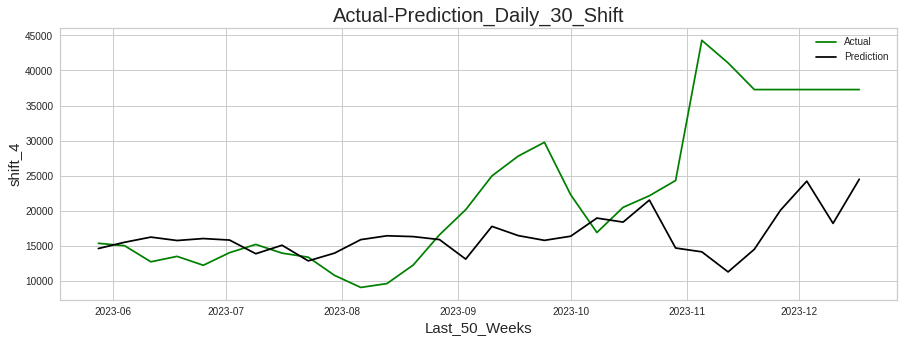

MAPE: 0.3125926472677315


In [292]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Daily_30_Shift",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

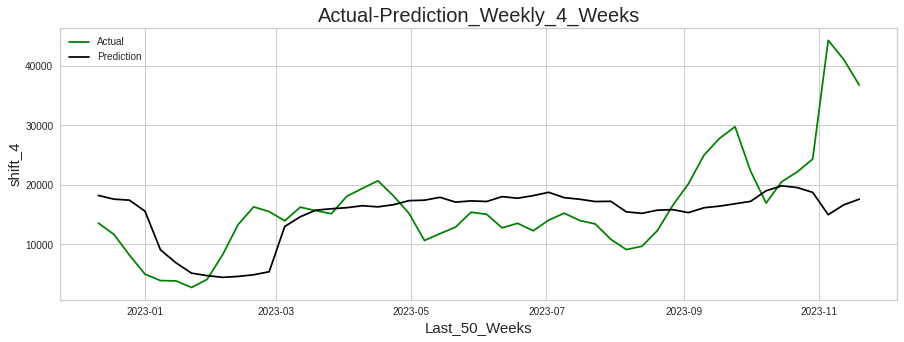

MAPE: 0.4150957811023586


In [298]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [1299]:
Res.head()

shift_4  prediction_label          diff      diff1_V  \
Date                                                                    
2022-12-11  13569.571289      17363.340034  -3793.768745          NaN   
2022-12-18  11666.286133      16982.060061  -5315.773928          NaN   
2022-12-25   8190.571289      16763.880051  -8573.308762          NaN   
2023-01-01   4979.856934      17787.522937 -12807.666003          NaN   
2023-01-08   3905.285645      12786.622849  -8881.337205 -9664.285156   

                diff1_P  
Date                     
2022-12-11          NaN  
2022-12-18          NaN  
2022-12-25          NaN  
2023-01-01          NaN  
2023-01-08 -4576.717185

In [765]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [766]:
directional_acc(Res["prediction_label"],Res["shift_30"],Tag_f.Value[-395:])

66.83544303797468

In [687]:
Tag_f.Value[-395:]

Date
2022-11-14    11995.0
2022-11-15    11371.0
2022-11-16    11054.0
2022-11-17     9855.0
2022-11-18     9305.0
               ...   
2023-12-09    35320.0
2023-12-10    35320.0
2023-12-11    36475.0
2023-12-12    38082.0
2023-12-13    35711.0
Name: Value, Length: 395, dtype: float64

In [879]:
Res["prediction_label"].shape

(365,)

In [ ]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_25_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [1738]:
# Res.to_csv("4_shift_reg_Cape_with_Targ.csv")

In [284]:
X_Final.shape

(1769, 632)

In [337]:
Train=X_Final.iloc[:X_Final.shape[0]-365,:]
Test=X_Final.iloc[X_Final.shape[0]-365:,:]

In [338]:
Train.shape

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(Train.drop("shift_30",axis=1))

In [339]:
Y_train = np.reshape(np.array(Train.shift_30), (-1,1))
Y_train= scaler.fit_transform(Y_train) 

In [340]:
Y_train.shape

(1396, 1)

In [341]:
X_train.shape

Train.shape

Train.shape

Y_train.shape

Y_test = np.reshape(np.array(Test.shift_30), (-1,1))
Y_test_S= scaler.fit_transform(Y_test) 

X_test = scaler.fit_transform(Test.drop("shift_30",axis=1))

X_test.shape

(365, 175)

In [344]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from keras.layers import LSTM

model1 = Sequential()
model1.add(LSTM(150, return_sequences=True, input_shape=(X_train.shape[1],1),activation='tanh'))

# model.add(Dense(units=5))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=True,activation='tanh'))

# model1.add(LSTM(10,return_sequences=True))
model1.add(LSTM(25))
model1.add(Dense(units=1))
model1.compile(optimizer='adam', loss='mse')

# model = Sequential()

# model.add(LSTM(150,return_sequences=True,kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', batch_input_shape=(1,X_train.shape[1],1), stateful=True))
# model.add(Dropout(0.3))
# model.add(LSTM(25, batch_input_shape=(1,X_train.shape[1],1), kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',stateful=True))
# model.add(Dropout(0.3))
# model.add((Dense(1)))
# model.compile(loss='mse', optimizer='adam')


model1.summary()

# from keras.callbacks import ModelCheckpoint,EarlyStopping
# file="weights.best_Baisc.hdf5"
# checkpoint = ModelCheckpoint(file, monitor='loss', verbose=1, save_best_only=True, mode='min')
# early_stop =  EarlyStopping(monitor='loss', min_delta=0.001, patience=200, verbose=1, mode='min')
# callbacks = [checkpoint,early_stop]

AttributeError: Exception encountered when calling layer "lstm_4" (type LSTM).

module 'tensorflow.compat.v2.__internal__.function' has no attribute 'defun_with_attributes'

Call arguments received by layer "lstm_4" (type LSTM):
  • inputs=tf.Tensor(shape=(None, 175, 1), dtype=float32)
  • mask=None
  • training=None
  • initial_state=None

In [849]:
# from sklearn.model_selection import GridSearchCV
# from keras.wrappers.scikit_learn import KerasRegressor

In [850]:
# def build_model(optimizer):
#     grid_model = Sequential()
#     grid_model.add(LSTM(64,activation='tanh', return_sequences=True,input_shape=(X_train.shape[1],1)))
#     grid_model.add(LSTM(64,activation='tanh', return_sequences=True))
#     grid_model.add(LSTM(64,activation='tanh'))
#     grid_model.add(Dropout(0.2))
#     grid_model.add(Dense(units=1))
#     grid_model.compile(loss = 'mse',optimizer = optimizer)
#     return grid_model

# grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(X_test,Y_test_S))
# parameters = {'batch_size' : [12,24],
#               'epochs' : [8,30],
#               'optimizer' : ['adam','Adadelta'] }
# grid_search  = GridSearchCV(estimator = grid_model,
#                             param_grid = parameters,
#                             cv = 3)

# grid_search = grid_search.fit(X_train,Y_train)
# # grid_search.best_params_
# # my_model = grid_search.best_estimator_.model

ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ggjps0806p/.local/lib/python3.8/site-packages/keras/wrappers/scikit_learn.py", line 167, in fit
    losses.is_categorical_crossentropy(self.model.loss)
AttributeError: module 'keras.losses' has no attribute 'is_categorical_crossentropy'


In [878]:
model.fit(X_train, Y_train, epochs =200, batch_size = 2)

Epoch 1/200
870/870 [==============================] - 57s 65ms/step - loss: 0.0090
Epoch 2/200
870/870 [==============================] - 54s 62ms/step - loss: 0.0091
Epoch 3/200
870/870 [==============================] - 55s 64ms/step - loss: 0.0102
Epoch 4/200
870/870 [==============================] - 54s 62ms/step - loss: 0.0088
Epoch 5/200
870/870 [==============================] - 54s 62ms/step - loss: 0.0087
Epoch 6/200
870/870 [==============================] - 54s 62ms/step - loss: 0.0074
Epoch 7/200
870/870 [==============================] - 55s 63ms/step - loss: 0.0075
Epoch 8/200
870/870 [==============================] - 56s 65ms/step - loss: 0.0069
Epoch 9/200
870/870 [==============================] - 54s 62ms/step - loss: 0.0069
Epoch 10/200
870/870 [==============================] - 55s 63ms/step - loss: 0.0058
Epoch 11/200
870/870 [==============================] - 54s 62ms/step - loss: 0.0059
Epoch 12/200
870/870 [==============================] - 72s 83ms/step - lo

870/870 [==============================] - 53s 60ms/step - loss: 3.7010e-04
Epoch 189/200
870/870 [==============================] - 53s 61ms/step - loss: 2.8391e-04
Epoch 190/200
870/870 [==============================] - 52s 60ms/step - loss: 3.4324e-04
Epoch 191/200
870/870 [==============================] - 53s 61ms/step - loss: 3.4882e-04
Epoch 192/200
870/870 [==============================] - 55s 63ms/step - loss: 2.7194e-04
Epoch 193/200
870/870 [==============================] - 53s 61ms/step - loss: 3.3467e-04
Epoch 194/200
870/870 [==============================] - 54s 62ms/step - loss: 2.9471e-04
Epoch 195/200
870/870 [==============================] - 55s 63ms/step - loss: 2.6863e-04
Epoch 196/200
870/870 [==============================] - 54s 62ms/step - loss: 3.4467e-04
Epoch 197/200
870/870 [==============================] - 53s 61ms/step - loss: 3.2927e-04
Epoch 198/200
870/870 [==============================] - 53s 61ms/step - loss: 2.3892e-04
Epoch 199/200
870/870 [=

In [890]:
model.save("200_epoc_daily.h5")

In [881]:
y_RNN = model.predict(X_test)

12/12 [==============================] - 0s 34ms/step


In [882]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler(feature_range=(0,1))
X_test_2 = scaler1.fit_transform(Test.iloc[:,:])

In [883]:
inv_yhat = np.concatenate([X_test,y_RNN], axis=1)

In [884]:
Y_Rnn_n = scaler1.inverse_transform(inv_yhat)

In [885]:
Y_Rnn_n[:,-1]

array([ 5.9597705 ,  6.05275987,  5.88588651,  5.72561643,  5.63755843,
        5.61554849,  5.56120001,  5.57082033,  5.52198763,  5.55637883,
        5.61735643,  5.60889885,  5.70916559,  5.85640465,  5.81295018,
        5.79441933,  5.73624825,  5.97489217,  5.49776773,  5.03770438,
        4.65408456,  4.63231933,  4.57133108,  4.49169192,  4.64915851,
        4.91777521,  4.8044197 ,  4.75890194,  4.72833562,  4.71549079,
        4.81738308,  5.20495924,  4.97107799,  4.90222113,  5.41190374,
        5.08153199,  5.69829285,  6.41842489,  6.35919899,  5.78273496,
        4.44336003,  3.78284299,  3.89199138,  4.70643207,  5.44245866,
        6.1572497 ,  6.10911541,  6.71062693,  7.80346273,  6.94983473,
        6.47907344,  6.6946997 ,  7.13997729,  8.04150476,  8.35681336,
        8.54594669,  8.86861549,  9.26474956,  9.01564632,  8.94901842,
        9.05100191,  8.93570241,  8.92583966,  8.51280867,  8.61412871,
        9.23299846, 10.32923204,  9.299007  ,  9.78072691,  9.93

In [886]:
inv_y = np.concatenate( [X_test,Y_test_S], axis=1)
inv_yy=scaler.inverse_transform(inv_y)
inv_yy[:,-1]

array([12.73902327, 15.74125874, 16.65527915, 16.65527915, 16.65527915,
       16.47403416, 17.92691734, 21.41539608, 20.02974894, 17.08110742,
       17.08110742, 17.08110742, 17.08110742, 17.08110742, 17.08110742,
       17.08110742, 17.08110742, 17.08110742, 17.08110742, 17.08110742,
       12.02573656, 11.06494325, 10.96555084, 11.03376132, 11.03376132,
       11.03376132, 11.71001949, 11.22669953, 10.68783675,  9.71340135,
        9.30608736,  9.30608736,  9.30608736,  9.40742864,  8.83543506,
        7.75868394,  6.0261378 ,  5.17350682,  5.17350682,  5.17350682,
        4.74962742,  4.35010891,  3.90868967,  3.2460736 ,  3.13109022,
        3.13109022,  3.13109022,  3.11647369,  3.10965264,  2.84265734,
        2.40513585,  2.28138255,  2.28138255,  2.28138255,  2.19758111,
        2.39441706,  2.63802591,  2.46749971,  2.74131606,  2.74131606,
        2.74131606,  3.13011579,  1.897455  ,  1.37418319,  1.0331308 ,
        1.        ,  1.        ,  1.        ,  1.10523902,  1.26

In [887]:
X_test

array([[0.298125  , 0.13076169, 0.45092478, ..., 0.5034465 , 0.90909091,
        0.88235294],
       [0.25022727, 0.10193963, 0.41874229, ..., 0.49551531, 0.90909091,
        0.88235294],
       [0.24613636, 0.08989866, 0.4175709 , ..., 0.48852047, 0.90909091,
        0.88235294],
       ...,
       [0.58664773, 0.29535796, 0.87342787, ..., 0.92917546, 0.90909091,
        0.8627451 ],
       [0.58664773, 0.29535796, 0.87342787, ..., 0.93676748, 0.90909091,
        0.8627451 ],
       [0.64590909, 0.32864771, 0.91288533, ..., 0.94989983, 0.90909091,
        0.88235294]])

Text(0.5, 1.0, 'Basic LSTM_$_Layers_17_neuron each')

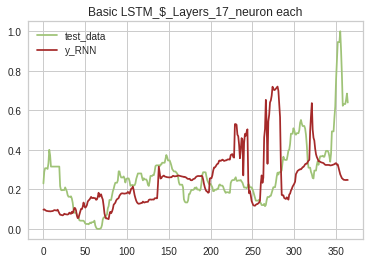

In [888]:
plt.plot(Y_test_S, label = "test_data", color = "g")
plt.plot(y_RNN, label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_17_neuron each")

In [889]:
Y_Rnn_n[:,-1]

array([ 5.9597705 ,  6.05275987,  5.88588651,  5.72561643,  5.63755843,
        5.61554849,  5.56120001,  5.57082033,  5.52198763,  5.55637883,
        5.61735643,  5.60889885,  5.70916559,  5.85640465,  5.81295018,
        5.79441933,  5.73624825,  5.97489217,  5.49776773,  5.03770438,
        4.65408456,  4.63231933,  4.57133108,  4.49169192,  4.64915851,
        4.91777521,  4.8044197 ,  4.75890194,  4.72833562,  4.71549079,
        4.81738308,  5.20495924,  4.97107799,  4.90222113,  5.41190374,
        5.08153199,  5.69829285,  6.41842489,  6.35919899,  5.78273496,
        4.44336003,  3.78284299,  3.89199138,  4.70643207,  5.44245866,
        6.1572497 ,  6.10911541,  6.71062693,  7.80346273,  6.94983473,
        6.47907344,  6.6946997 ,  7.13997729,  8.04150476,  8.35681336,
        8.54594669,  8.86861549,  9.26474956,  9.01564632,  8.94901842,
        9.05100191,  8.93570241,  8.92583966,  8.51280867,  8.61412871,
        9.23299846, 10.32923204,  9.299007  ,  9.78072691,  9.93

In [327]:
X_test

array([[0.58934391, 0.26050946, 0.26237876, ..., 0.94117647, 1.        ,
        0.94117647],
       [0.58934391, 0.2146847 , 0.11244804, ..., 0.96078431, 1.        ,
        0.96078431],
       [0.58934391, 0.13100111, 0.        , ..., 0.98039216, 1.        ,
        0.98039216],
       ...,
       [0.97625772, 1.        , 0.84737111, ..., 0.84313725, 0.90909091,
        0.84313725],
       [0.96676081, 0.92268984, 0.84737111, ..., 0.8627451 , 0.90909091,
        0.8627451 ],
       [0.96676081, 0.81876122, 0.81637862, ..., 0.88235294, 0.90909091,
        0.88235294]])

Text(0.5, 1.0, 'Basic LSTM_$_Layers_17_neuron each')

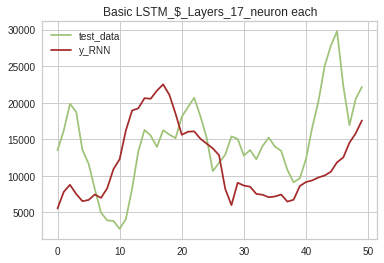

In [328]:
plt.plot(np.array(X_Final["Value"].iloc[-50:]), label = "test_data", color = "g")
plt.plot( Y_Rnn_n[:,-1], label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_17_neuron each")

In [329]:
inv_yhat = np.concatenate( [X_test,y_RNN], axis=1)
inv_yhat

array([[0.58934391, 0.26050946, 0.26237876, ..., 1.        , 0.94117647,
        0.103622  ],
       [0.58934391, 0.2146847 , 0.11244804, ..., 1.        , 0.96078431,
        0.18736932],
       [0.58934391, 0.13100111, 0.        , ..., 1.        , 0.98039216,
        0.22336823],
       ...,
       [0.97625772, 1.        , 0.84737111, ..., 0.90909091, 0.84313725,
        0.43646538],
       [0.96676081, 0.92268984, 0.84737111, ..., 0.90909091, 0.8627451 ,
        0.48331115],
       [0.96676081, 0.81876122, 0.81637862, ..., 0.90909091, 0.88235294,
        0.54861224]])

In [330]:
# # invert scaling for forecast
inv_yhat = np.concatenate( [X_test,Y_Rnn_n[:,-1].reshape(-1,1)], axis=1)
Y_Rnn_n = scaler.inverse_transform(inv_yhat)



In [331]:
Y_Rnn_n[:,0]

array([18089.        , 18089.        , 18089.        , 16945.28571429,
       10083.        , 10083.        , 10083.        , 10083.        ,
        8050.85714286,  7238.        ,  7238.        ,  7238.        ,
       14176.57142857, 16952.        , 16952.        , 16952.        ,
       16338.28571429, 14804.        , 14804.        , 14804.        ,
       14804.        , 18982.        , 18982.        , 18982.        ,
       18982.        , 18043.14285714, 17339.        , 17339.        ,
       17339.        , 16229.28571429, 13455.        , 13455.        ,
       13455.        , 13455.        , 11512.71428571, 11189.        ,
       11189.        , 11189.        , 13509.71428571, 16604.        ,
       16604.        , 16604.        , 17896.28571429, 25650.        ,
       25650.        , 25650.        , 25650.        , 25212.85714286,
       25038.        , 25038.        ])

In [332]:
Tag_f["Value"].iloc[-50:]

Date
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142857
2023-08-27    10833.142857
2023-09-03     9113.857143
2023-09-10     9666.857143
2023-09-17    12305.857

In [333]:
X_Final["Value"].iloc[-50:]

Date
2022-12-11    13507.285714
2022-12-18    16186.142857
2022-12-25    19851.714286
2023-01-01    18749.000000
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142

In [334]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [335]:
directional_acc(pd.DataFrame(Y_Rnn_n[:,-1]).values,pd.DataFrame(Y_test).values,X_Final["Value"].iloc[-50:].values)

2582.0

In [336]:
Mape=[]
for i  in range(len(Y_Rnn_n[:,-1])):
    Mape.append((Y_test[i] - Y_Rnn_n[:,-1][i]) / X_Final["Value"].iloc[-50:][i])

print("MAPE:",np.mean(Mape))

MAPE: -27432.871566582893


In [337]:
pd.DataFrame(Y_Rnn_n[:,-1])

0
0   1.499569e+08
1   2.111037e+08
2   2.373878e+08
3   2.034522e+08
4   1.768357e+08
5   1.811203e+08
6   2.015297e+08
7   1.888777e+08
8   2.246659e+08
9   2.947726e+08
10  3.319687e+08
11  4.378865e+08
12  5.116076e+08
13  5.197210e+08
14  5.571692e+08
15  5.550470e+08
16  5.850797e+08
17  6.080375e+08
18  5.696401e+08
19  4.997347e+08
20  4.218635e+08
21  4.333332e+08
22  4.346303e+08
23  4.073970e+08
24  3.893416e+08
25  3.718315e+08
26  3.465048e+08
27  2.219048e+08
28  1.622459e+08
29  2.448935e+08
30  2.343050e+08
31  2.302978e+08
32  2.035452e+08
33  2.005621e+08
34  1.913361e+08
35  1.941008e+08
36  2.012675e+08
37  1.752382e+08
38  1.819809e+08
39  2.325479e+08
40  2.475317e+08
41  2.535341e+08
42  2.644200e+08
43  2.715394e+08
44  2.853899e+08
45  3.204408e+08
46  3.383167e+08
47  3.929773e+08
48  4.271810e+08
49  4.748596e+08